# <center>Project Part-I (Clustering)<center>

<p>Team Name: Rock and Stone
<p>Student Names: Oluwaseun Doherty, Marco Figueroa
<p>Student W#s: 0730286 0745589

## Instructions
Use generic coding style unless hard-coded values are really necessary.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save. Then submit this <b>saved</b> copy.

## Imports

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import csv
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import calinski_harabasz_score

## Read Data

In [101]:
df = pd.read_csv('application_data.csv')
#dataset.head()
df1 = df.copy()
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
df1.shape

(307511, 122)

## Visual Exploration of Data

In [103]:
df1.select_dtypes('object').describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


In [104]:
#MISSING VALUE HANDLING
object_columns = df1.select_dtypes(include='object')

# Find missing values in object columns
missing_values = object_columns.isnull().sum()

# Display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Calculate percentage of missing values for all columns
percent = df1.isnull().sum().sort_values(ascending=False) / len(df1) * 100
percent = percent[percent > 0]

# Display columns with missing values and their percentage
result = pd.concat([columns_with_missing_values, percent], axis=1, keys=['Total', 'Percentage'])
print(result)

                           Total  Percentage
NAME_TYPE_SUITE           1292.0    0.420148
OCCUPATION_TYPE          96391.0   31.345545
FONDKAPREMONT_MODE      210295.0   68.386172
HOUSETYPE_MODE          154297.0   50.176091
WALLSMATERIAL_MODE      156341.0   50.840783
...                          ...         ...
EXT_SOURCE_2                 NaN    0.214626
AMT_GOODS_PRICE              NaN    0.090403
AMT_ANNUITY                  NaN    0.003902
CNT_FAM_MEMBERS              NaN    0.000650
DAYS_LAST_PHONE_CHANGE       NaN    0.000325

[67 rows x 2 columns]


In [105]:
#we are dropping columns with missing values greater than 50%
unwanted_objects = ['FONDKAPREMONT_MODE', 'WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE']

#missing value cleaning for other object attributes
df1['OCCUPATION_TYPE'] = df1['OCCUPATION_TYPE'].fillna('No Value')


df1['NAME_TYPE_SUITE'] = df1['NAME_TYPE_SUITE'].fillna(df1['NAME_TYPE_SUITE'].mode())

#missing value cleaning for float attributes
for col in df1.select_dtypes('float').columns:
    df1[col].fillna(df1[col].mean())



### Histograms

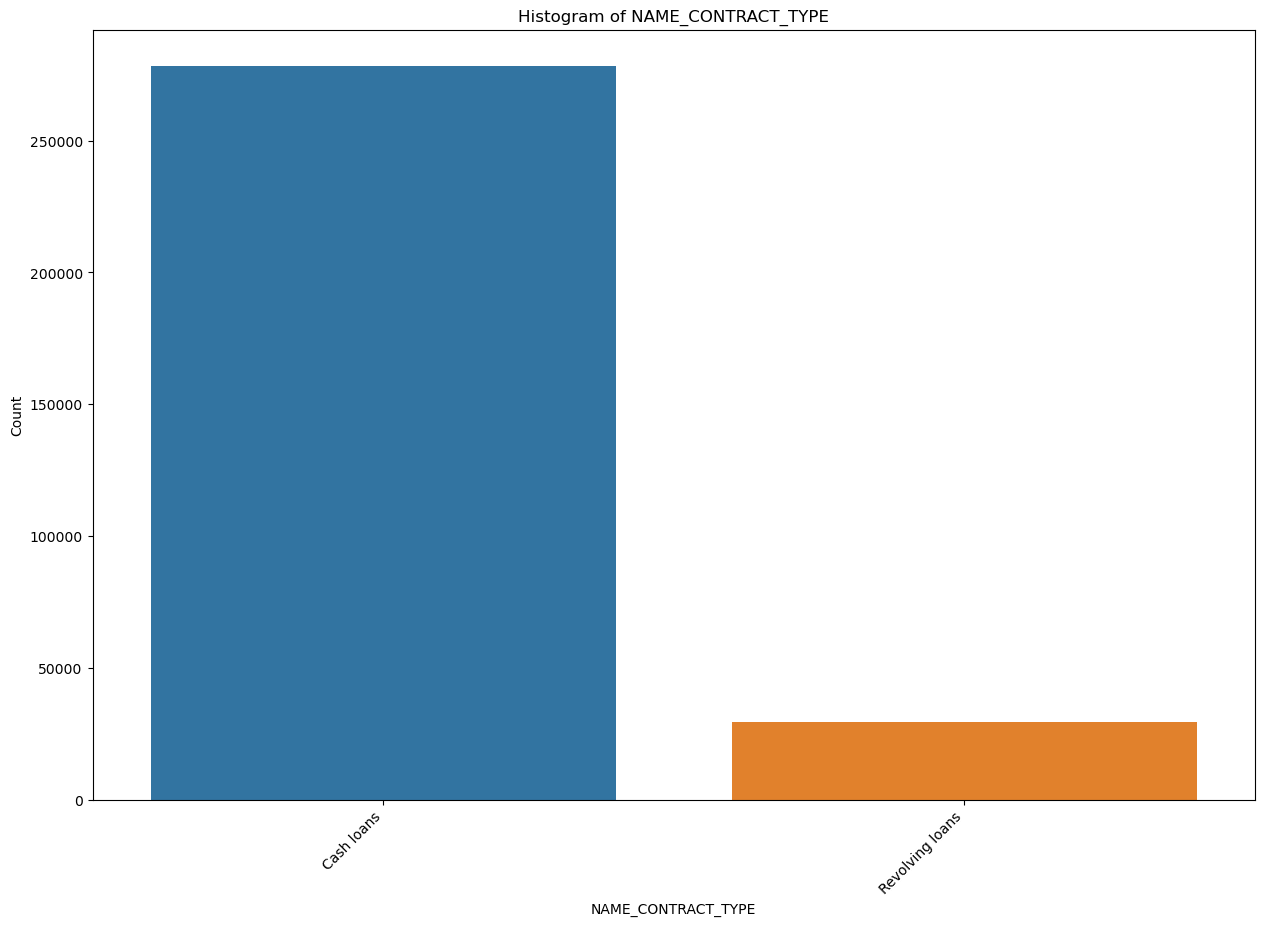

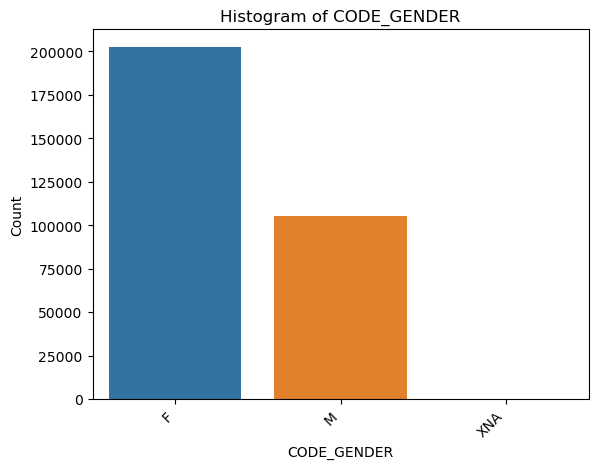

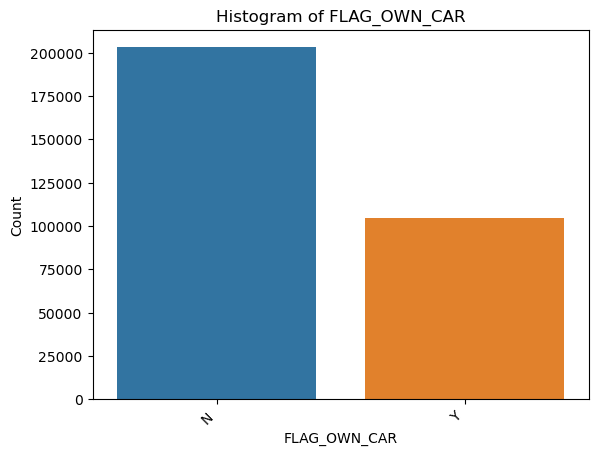

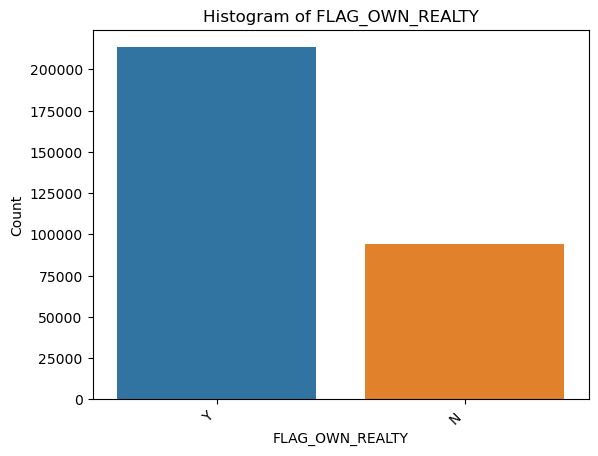

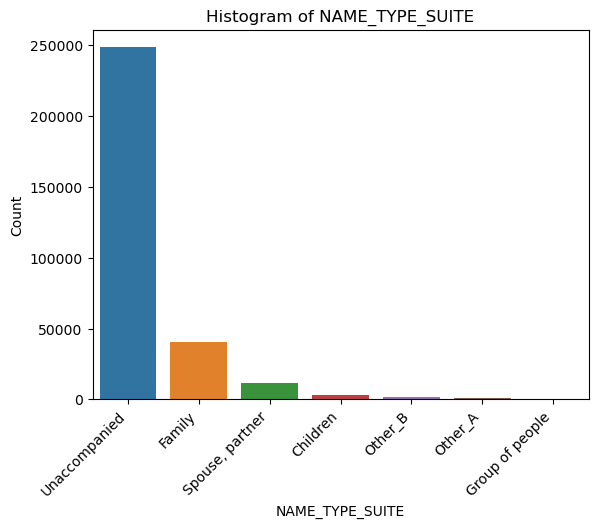

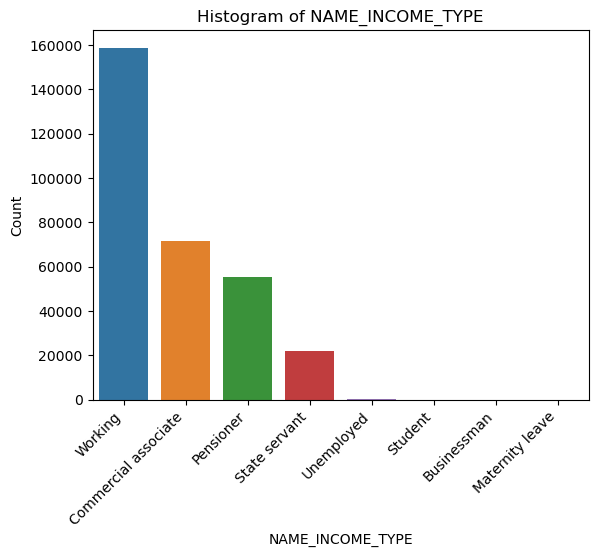

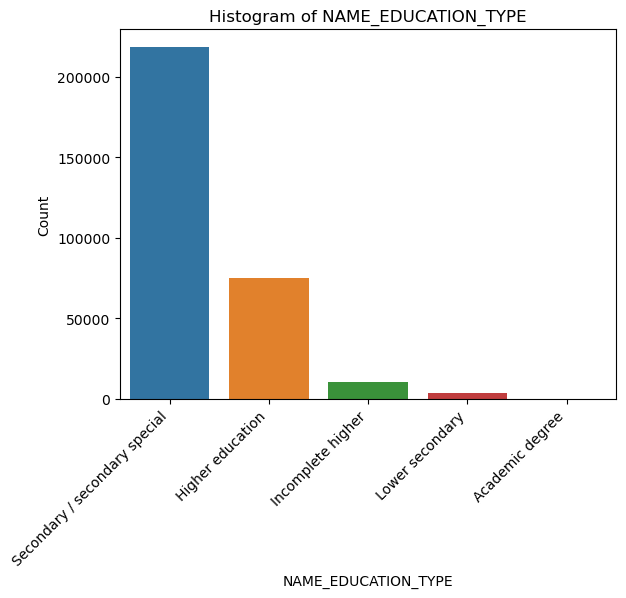

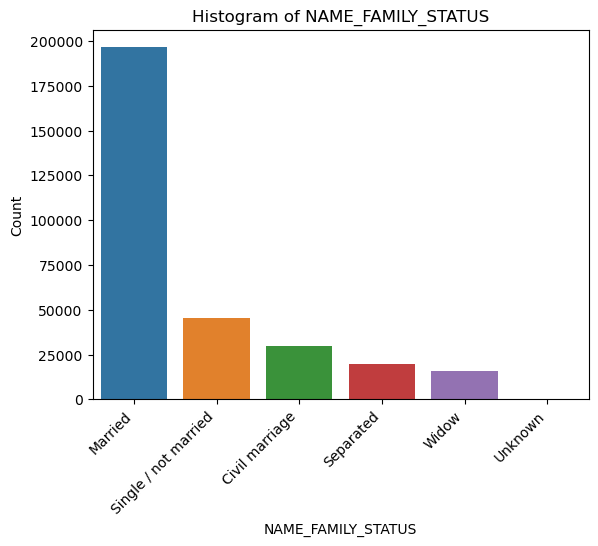

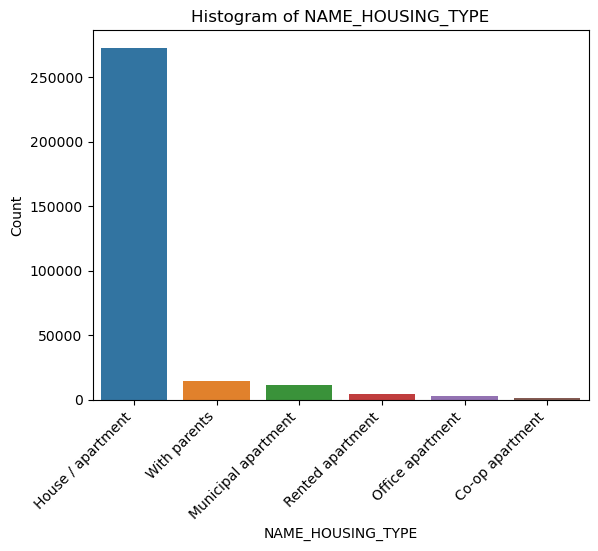

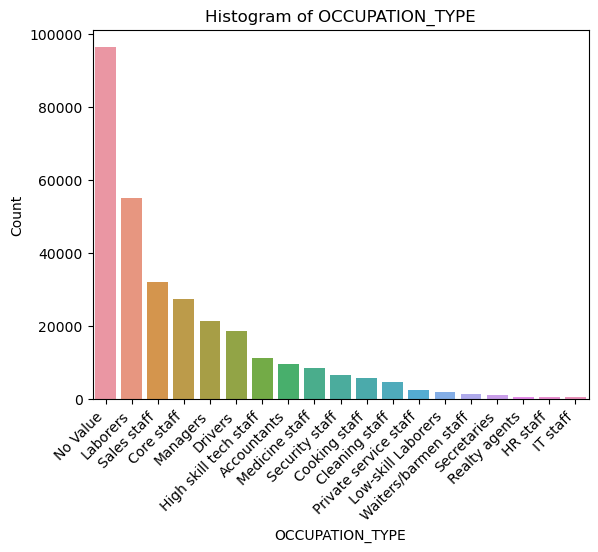

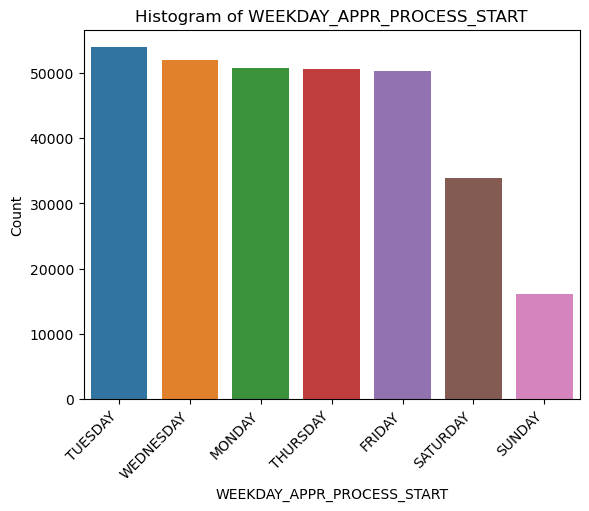

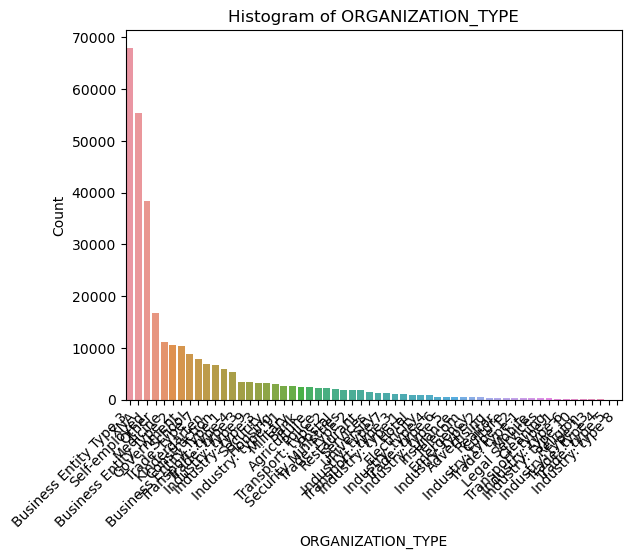

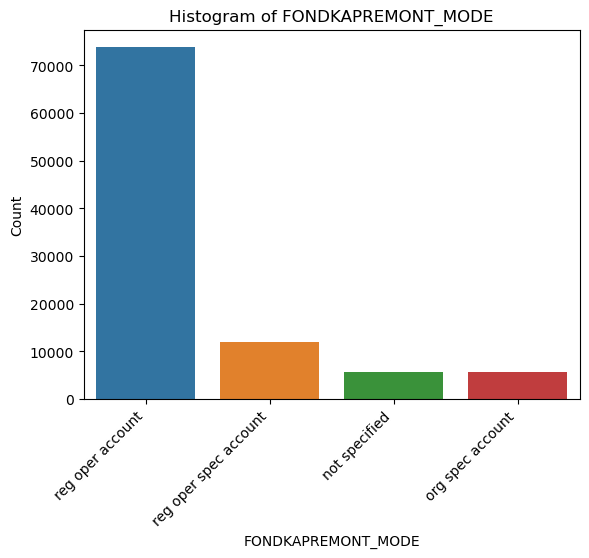

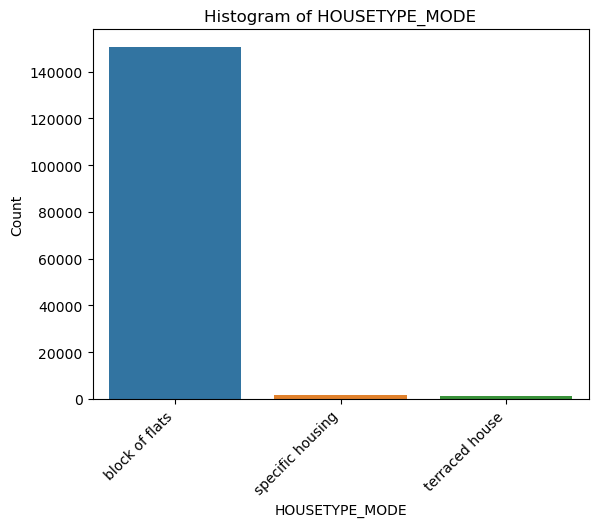

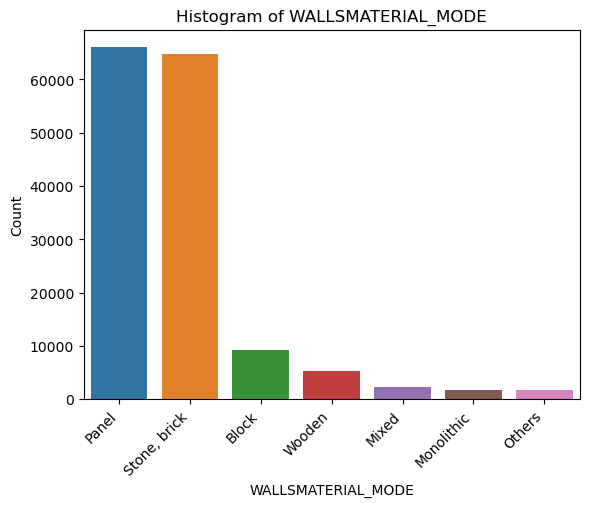

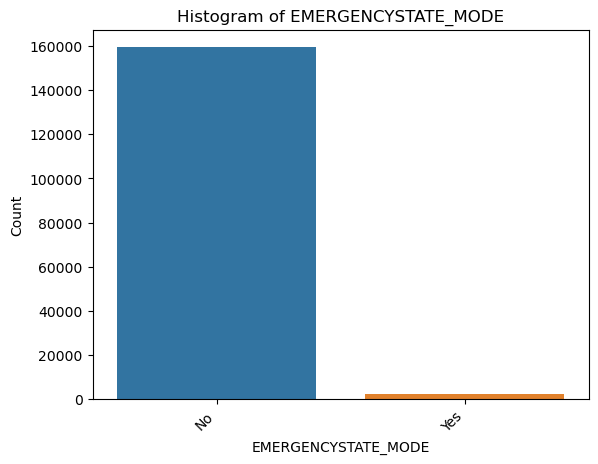

In [106]:
#ALL OBJECTS
object_columns = df1.select_dtypes(include='object')

# Plot histograms for all object columns
plt.figure(figsize=(15, 10))
for column in object_columns.columns:
    sns.countplot(data=df1, x=column, order=df1[column].value_counts().index)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

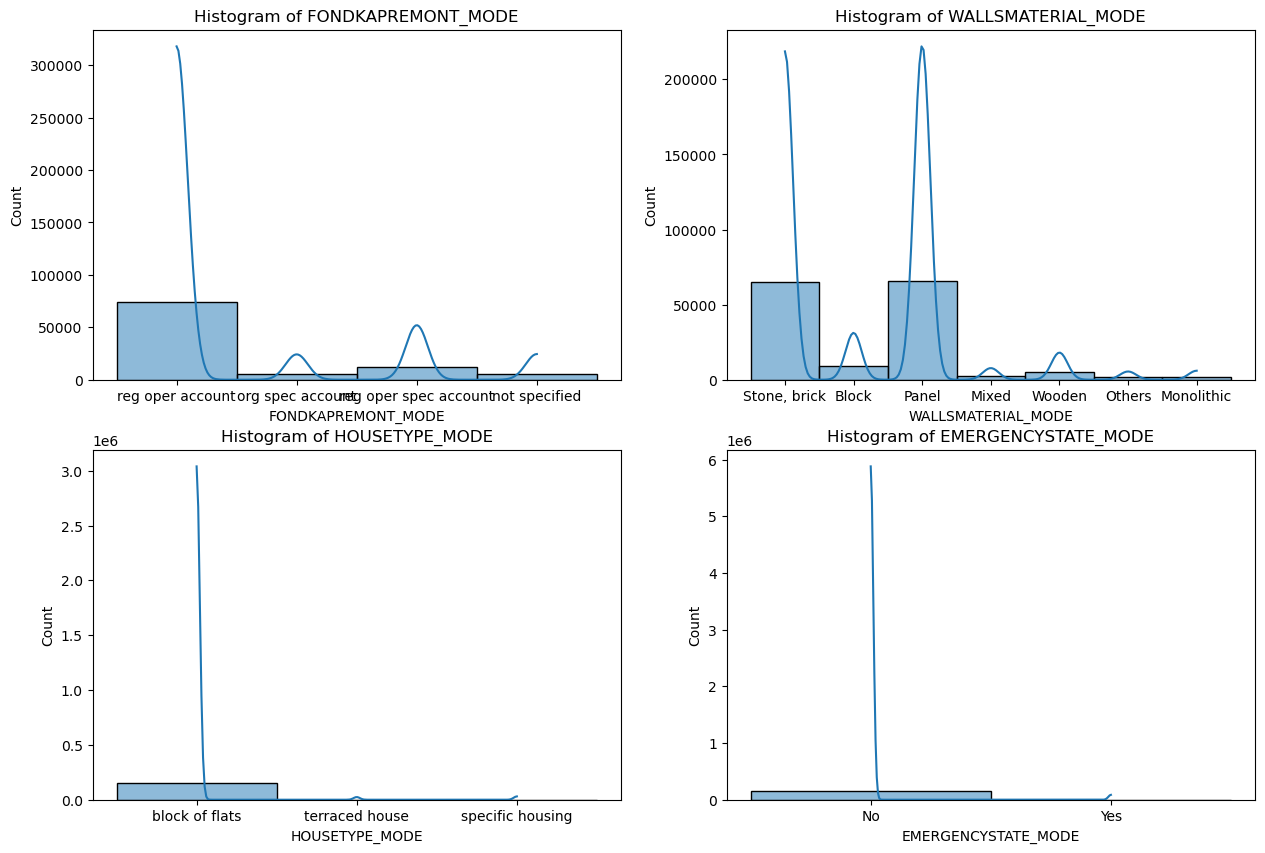

In [107]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


# Plot histograms for unwanted columns
for i, column in enumerate(unwanted_objects):
    row, col = divmod(i, 2)
    sns.histplot(data=df1, x=column, bins=30, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')

plt.show()

### Distributions

In [108]:
#Print integer attributes 
print(f"Integers\n{df1.select_dtypes('int').columns}")

#Print float attributes
print(f"\n\nFloats\n{df1.select_dtypes('float').columns}")

Integers
Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')


Floats
Index(['AMT_INCOME_TOTAL', '

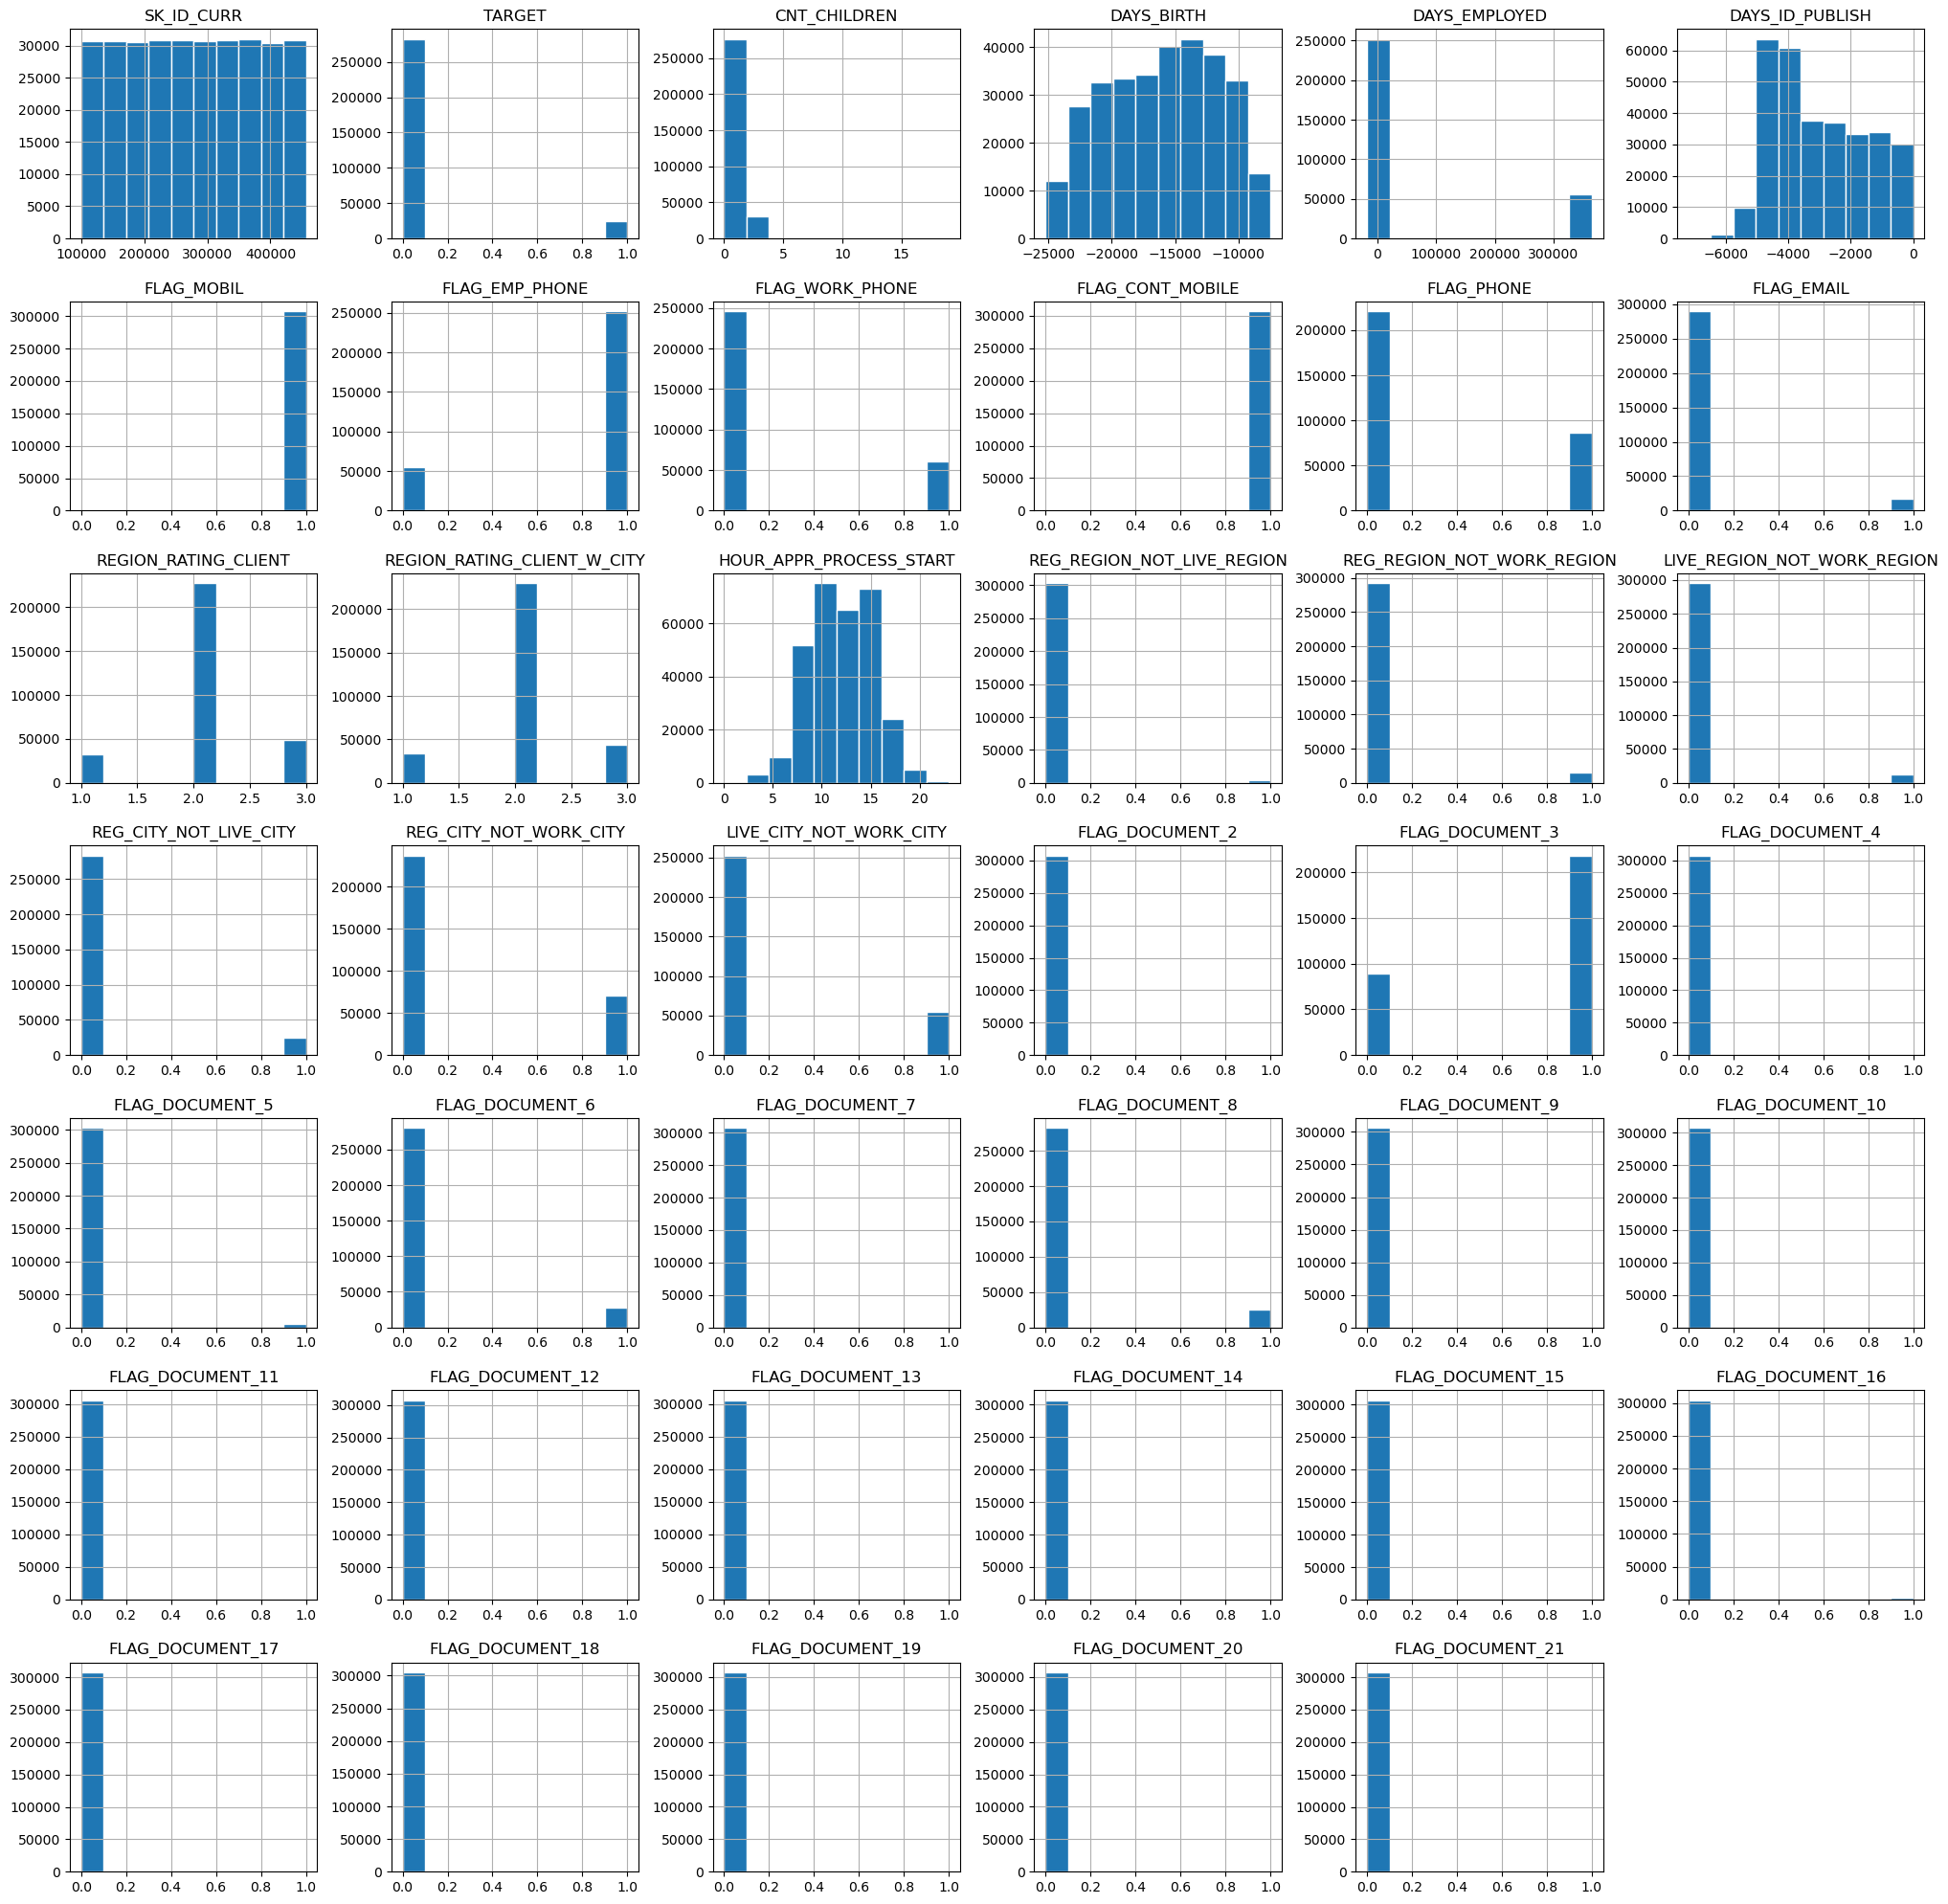

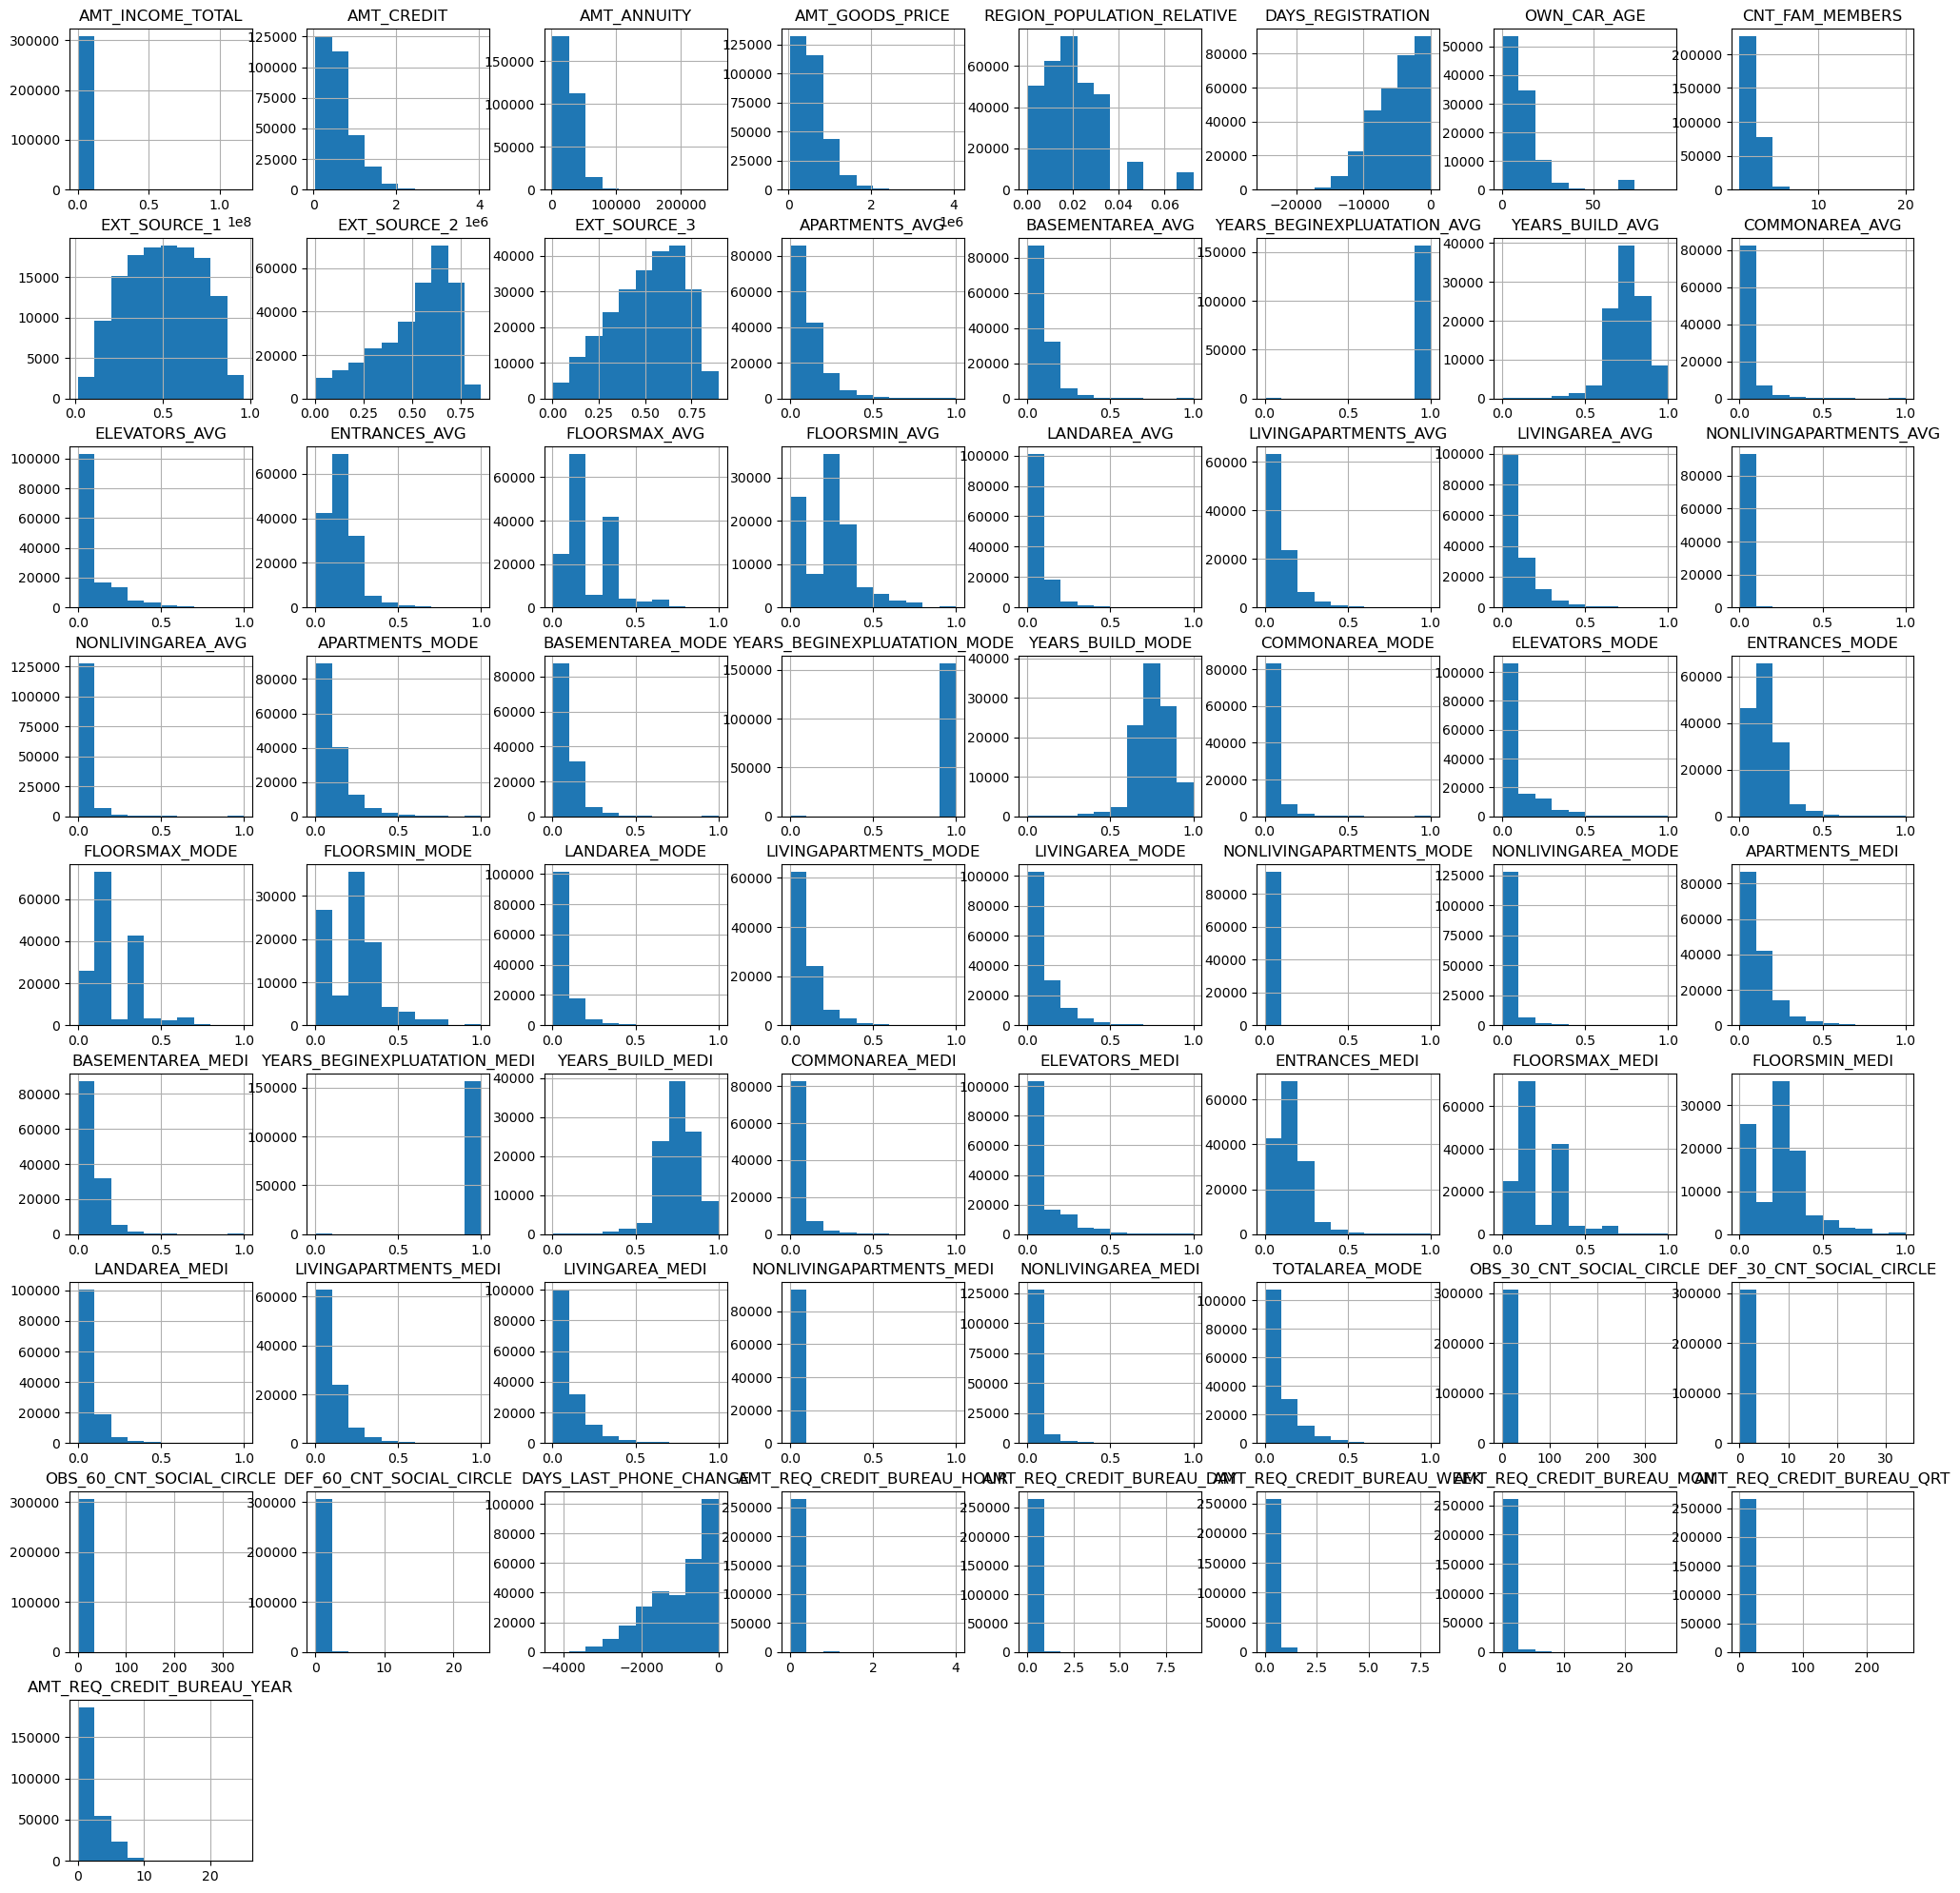

In [109]:
# Integer Sections
contact = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']
region =  ['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION']
city = ['REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
docs = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
rate = ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']
other = ['CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED','DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START']
target = ['TARGET']

# Float sections
amt = ["AMT_INCOME_TOTAL","AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]


#Devide

#NOW WE VISUALIZE EACH
#Integers
df1.select_dtypes('int').hist(figsize=(25,25), ec='w')
plt.show()

#Floats
df1.select_dtypes('float').hist(figsize=(25,25))
plt.show()


### Box-Whisker Plots

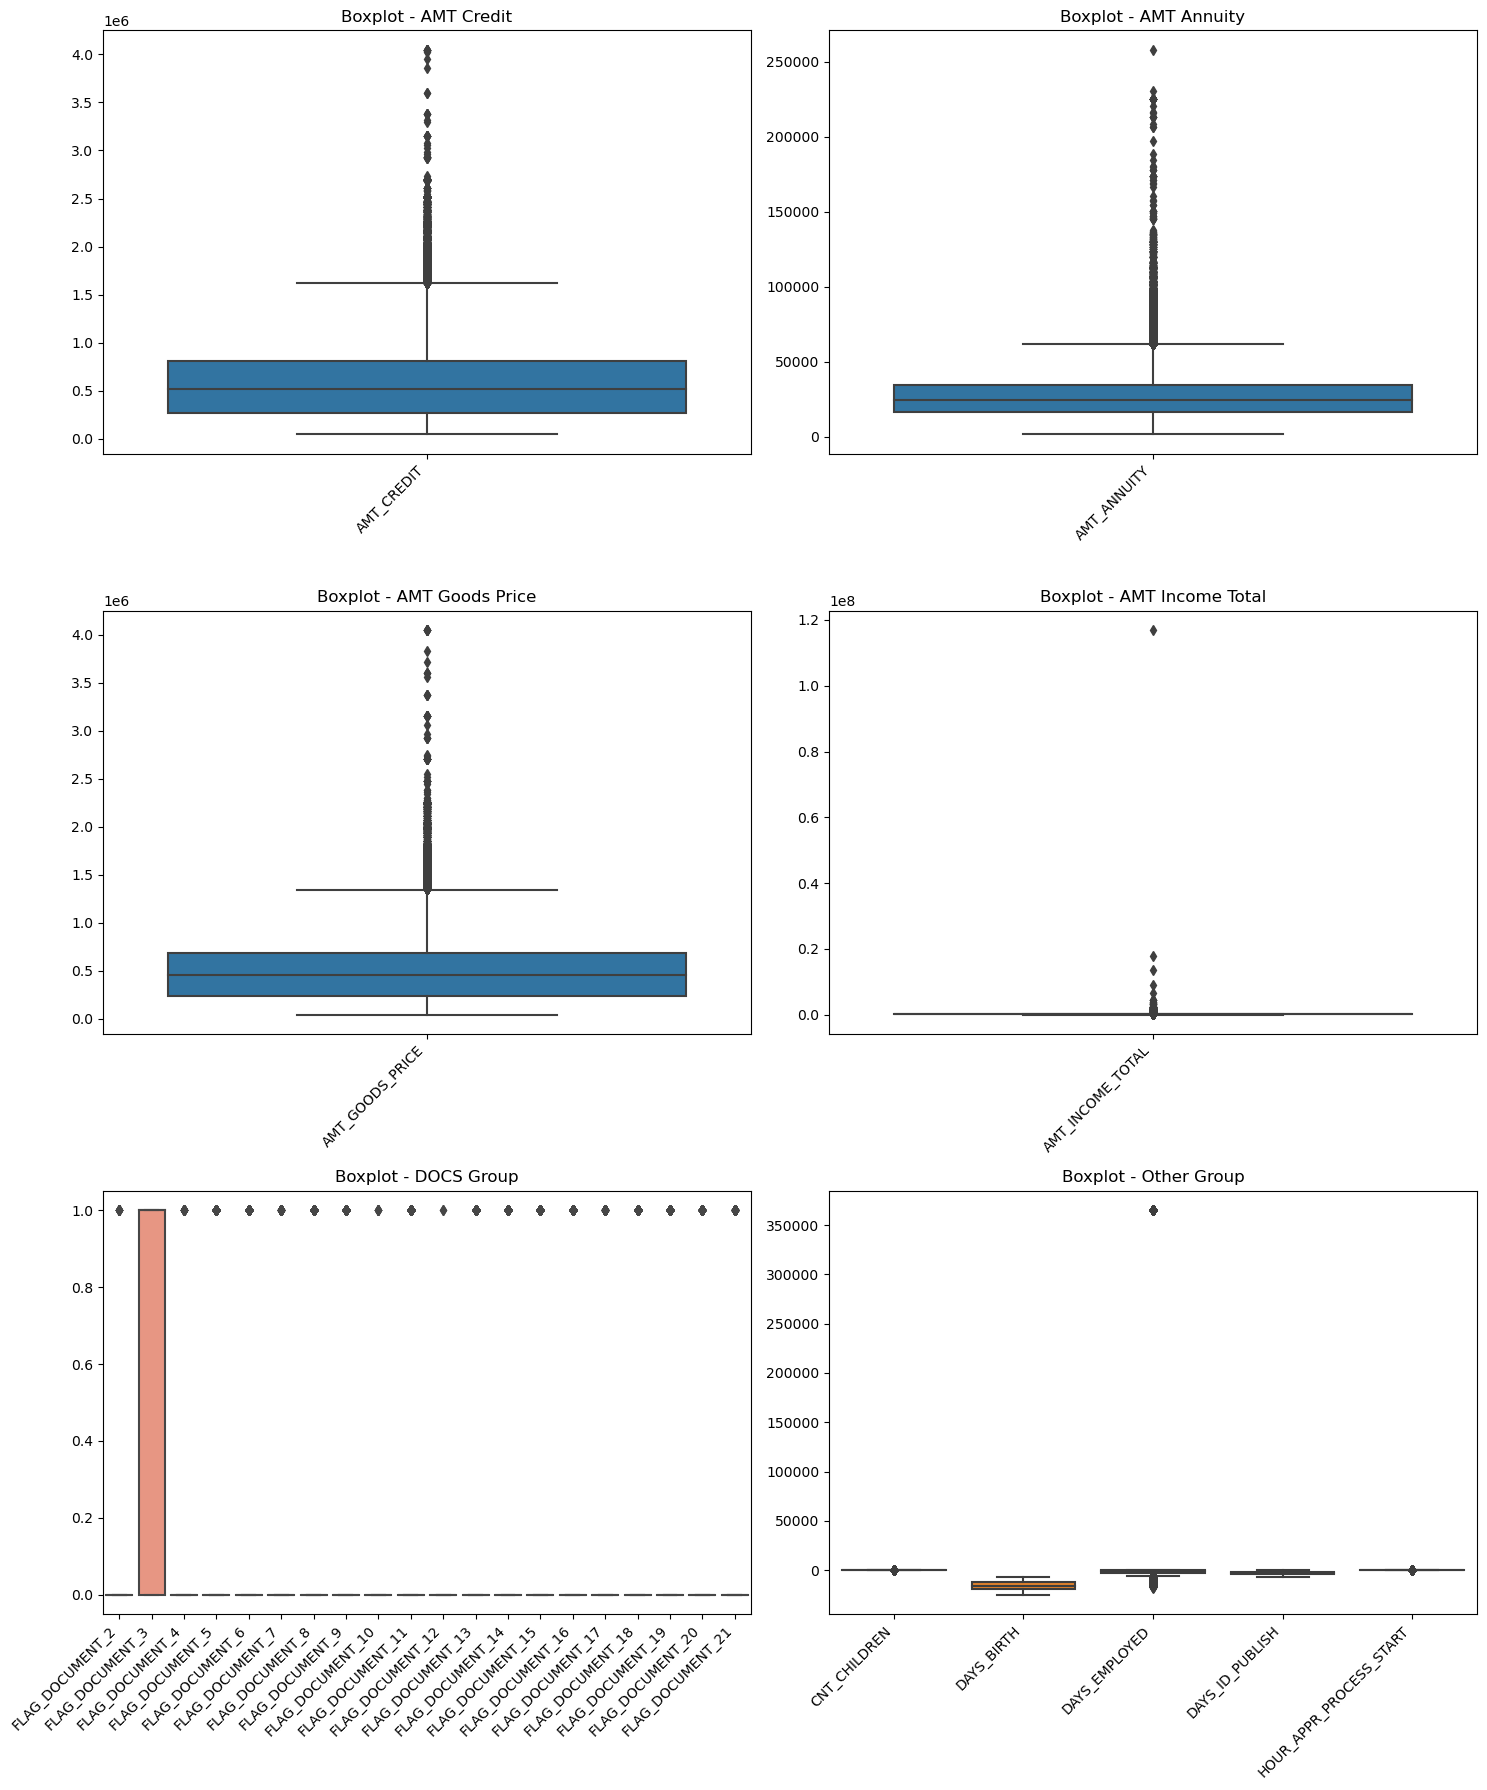

In [110]:
# Create individual boxplots for each group
plt.figure(figsize=(15, 18))

plt.subplot(3, 2, 1)
sns.boxplot(data=df[["AMT_CREDIT"]])
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Boxplot - AMT Credit')

plt.subplot(3, 2, 2)
sns.boxplot(data=df[["AMT_ANNUITY"]])
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Boxplot - AMT Annuity')

plt.subplot(3, 2, 3)
sns.boxplot(data=df[["AMT_GOODS_PRICE"]])
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Boxplot - AMT Goods Price')

plt.subplot(3, 2, 4)
sns.boxplot(data=df[["AMT_INCOME_TOTAL"]])
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Boxplot - AMT Income Total')

plt.subplot(3, 2, 5)
sns.boxplot(data=df[docs])
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Boxplot - DOCS Group')

plt.subplot(3, 2, 6)
sns.boxplot(data=df[other])
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Boxplot - Other Group')

plt.tight_layout()
plt.show()

### Violin Plots

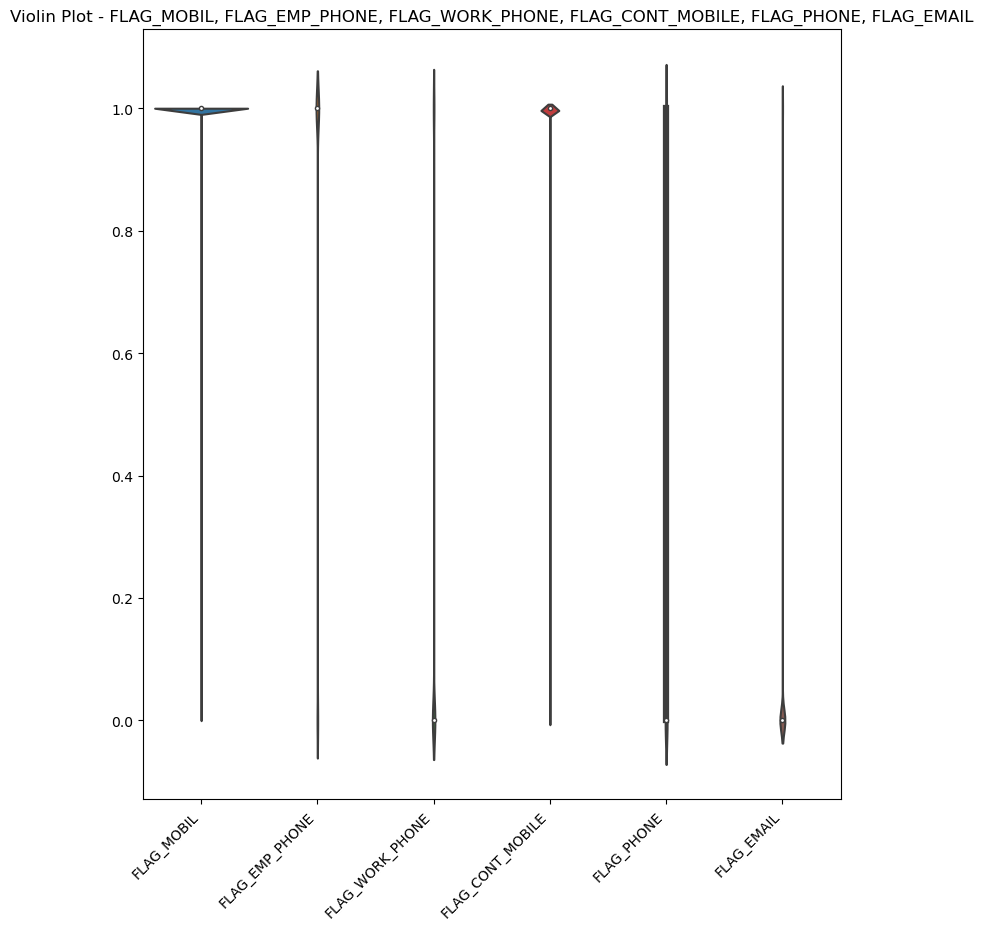

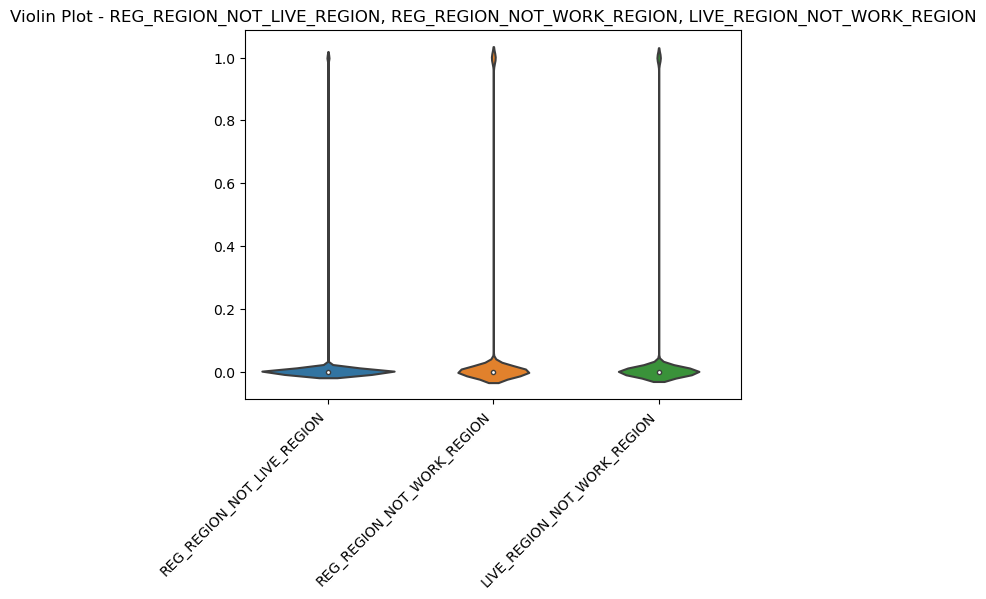

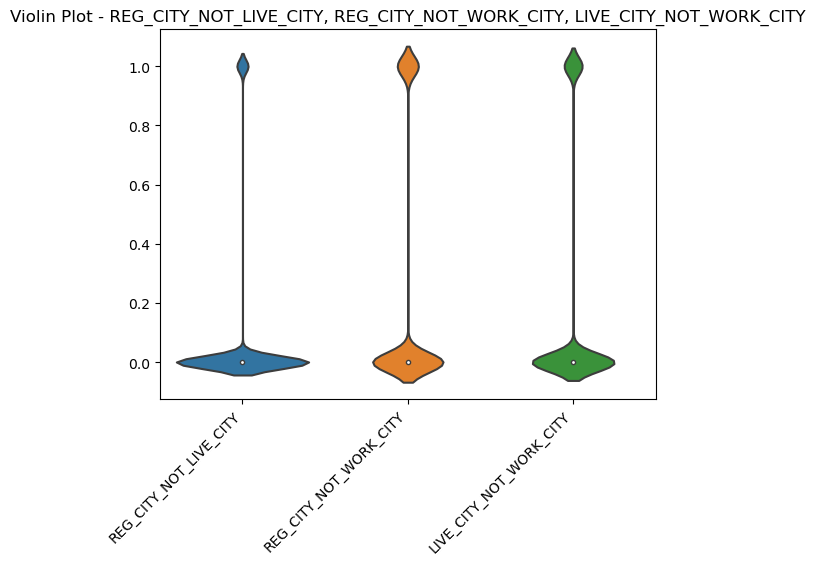

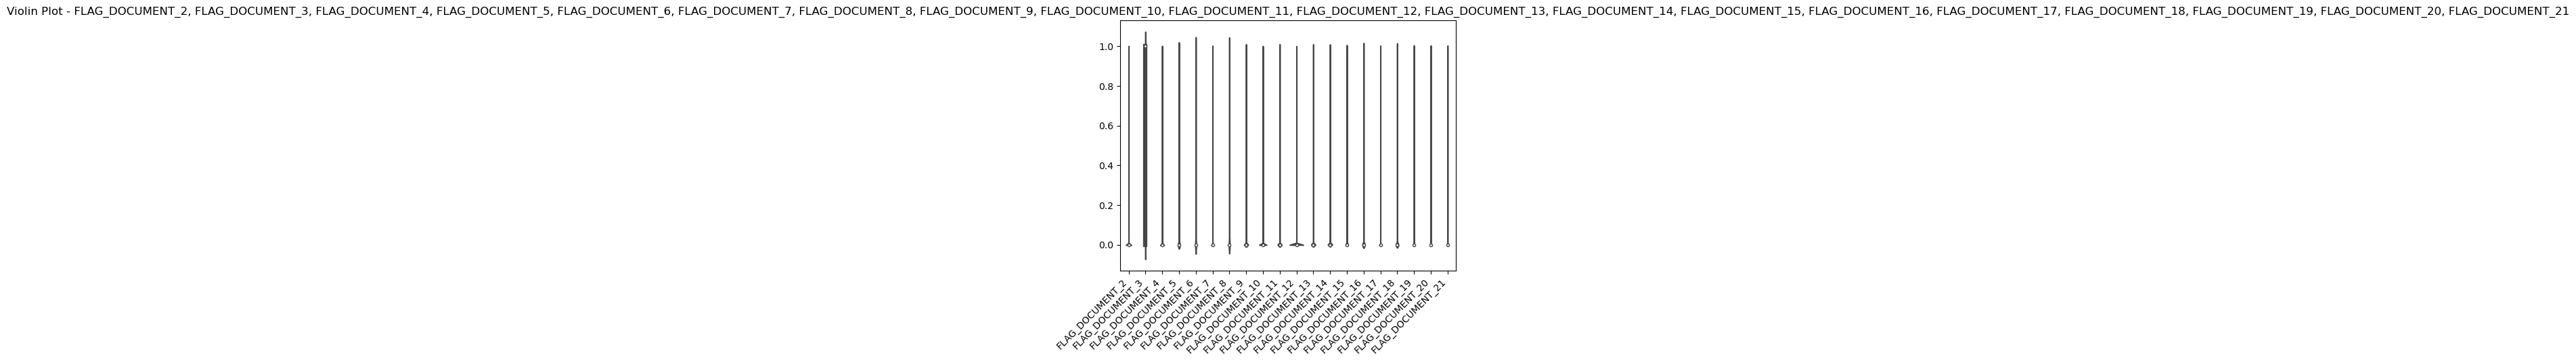

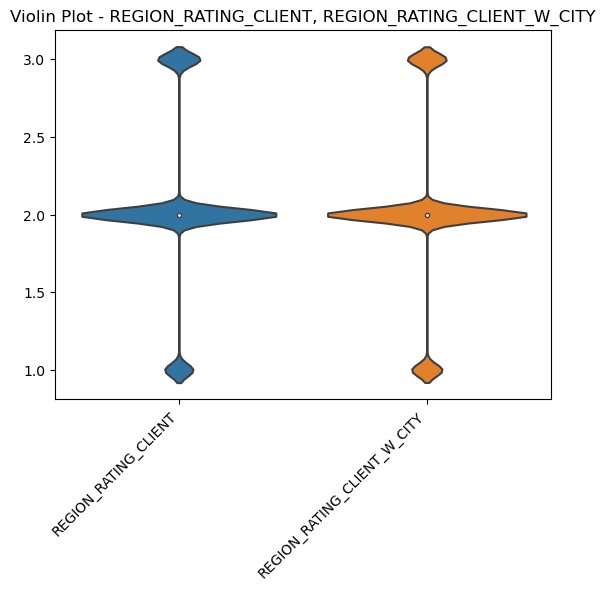

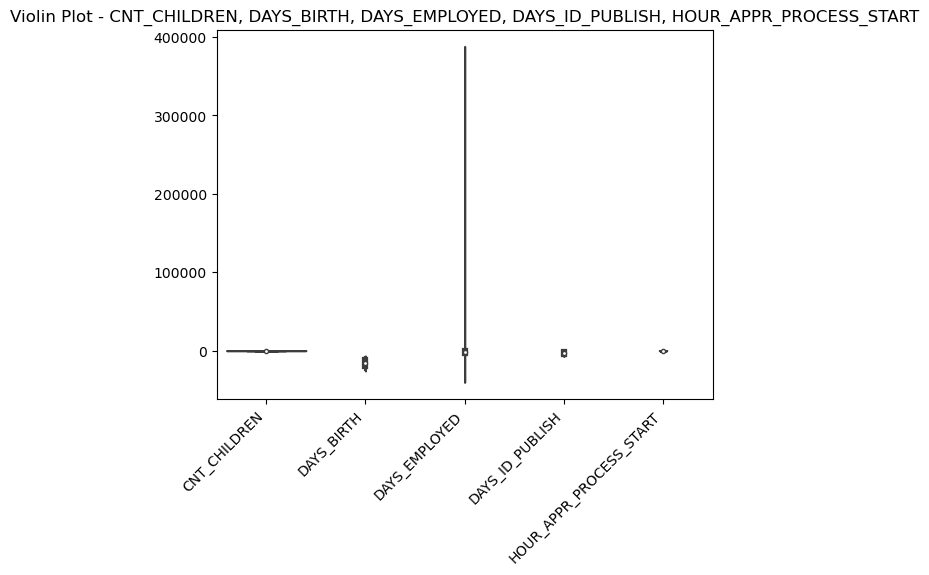

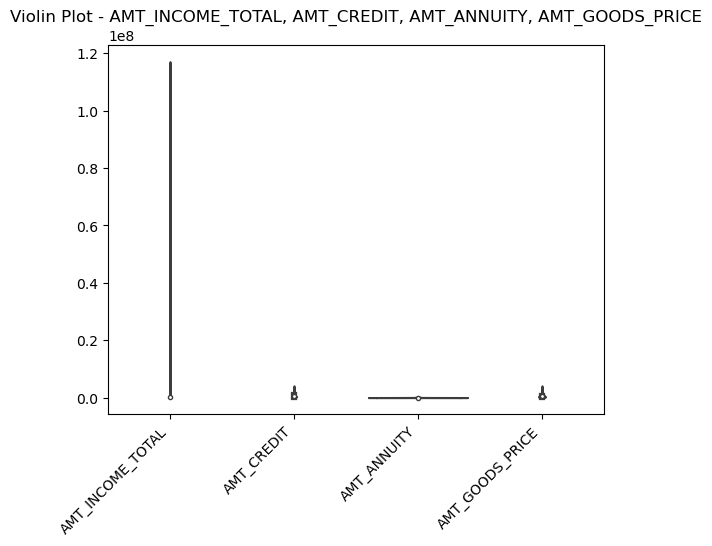

In [111]:
plt.figure(figsize=(9, 10))
for column in [contact, region, city, docs, rate, other, amt]:
    sns.violinplot(data=df[column])
    plt.title(f'Violin Plot - {", ".join(column)}')
    plt.xticks(rotation=45, horizontalalignment='right')
    plt.show()



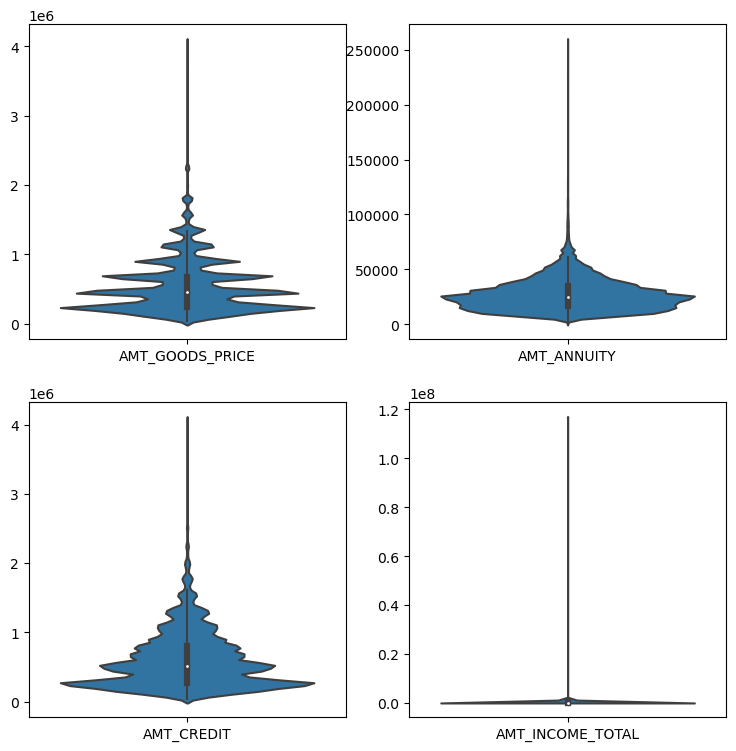

In [112]:
fig, ax = plt.subplots(2,2, figsize=(9, 9))
sns.violinplot(data=df[["AMT_GOODS_PRICE"]], ax = ax[0, 0])
sns.violinplot(data=df[["AMT_ANNUITY"]], ax = ax[0, 1])
sns.violinplot(data=df[["AMT_CREDIT"]], ax = ax[1, 0])
sns.violinplot(data=df[["AMT_INCOME_TOTAL"]], ax = ax[1, 1])

plt.show()


## Data Quality & Cleaning

In [113]:
# Drop the unwanted objects
df1 = df1.drop(unwanted_objects, axis=1)

# Keep the relevant 10 attributes
df1 = df1[["FLAG_OWN_CAR", "FLAG_OWN_REALTY","AMT_INCOME_TOTAL", "AMT_GOODS_PRICE" , "AMT_ANNUITY", "AMT_CREDIT","CODE_GENDER", "NAME_CONTRACT_TYPE", "HOUR_APPR_PROCESS_START", 'TARGET']]

df1.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_CREDIT,CODE_GENDER,NAME_CONTRACT_TYPE,HOUR_APPR_PROCESS_START,TARGET
0,N,Y,202500.0,351000.0,24700.5,406597.5,M,Cash loans,10,1
1,N,N,270000.0,1129500.0,35698.5,1293502.5,F,Cash loans,11,0
2,Y,Y,67500.0,135000.0,6750.0,135000.0,M,Revolving loans,9,0
3,N,Y,135000.0,297000.0,29686.5,312682.5,F,Cash loans,17,0
4,N,Y,121500.0,513000.0,21865.5,513000.0,M,Cash loans,11,0


## Handling Redundancy

### X-square Test

In [114]:
# Retrieve the Categorical Attributes excluding 'TARGET'
df1_categorical = df1.select_dtypes(include='object')

# Retrieve target column
target = df1['TARGET']

df1_categorical.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CODE_GENDER,NAME_CONTRACT_TYPE
0,N,Y,M,Cash loans
1,N,N,F,Cash loans
2,Y,Y,M,Revolving loans
3,N,Y,F,Cash loans
4,N,Y,M,Cash loans


P value for FLAG_OWN_CAR and TARGET column = 9.330994431109667e-34
Degrees of Freedom = 1


P value for FLAG_OWN_REALTY and TARGET column = 0.0006681470317545887
Degrees of Freedom = 1


P value for CODE_GENDER and TARGET column = 1.1290217848908289e-200
Degrees of Freedom = 2


P value for NAME_CONTRACT_TYPE and TARGET column = 1.0235150721172847e-65
Degrees of Freedom = 1




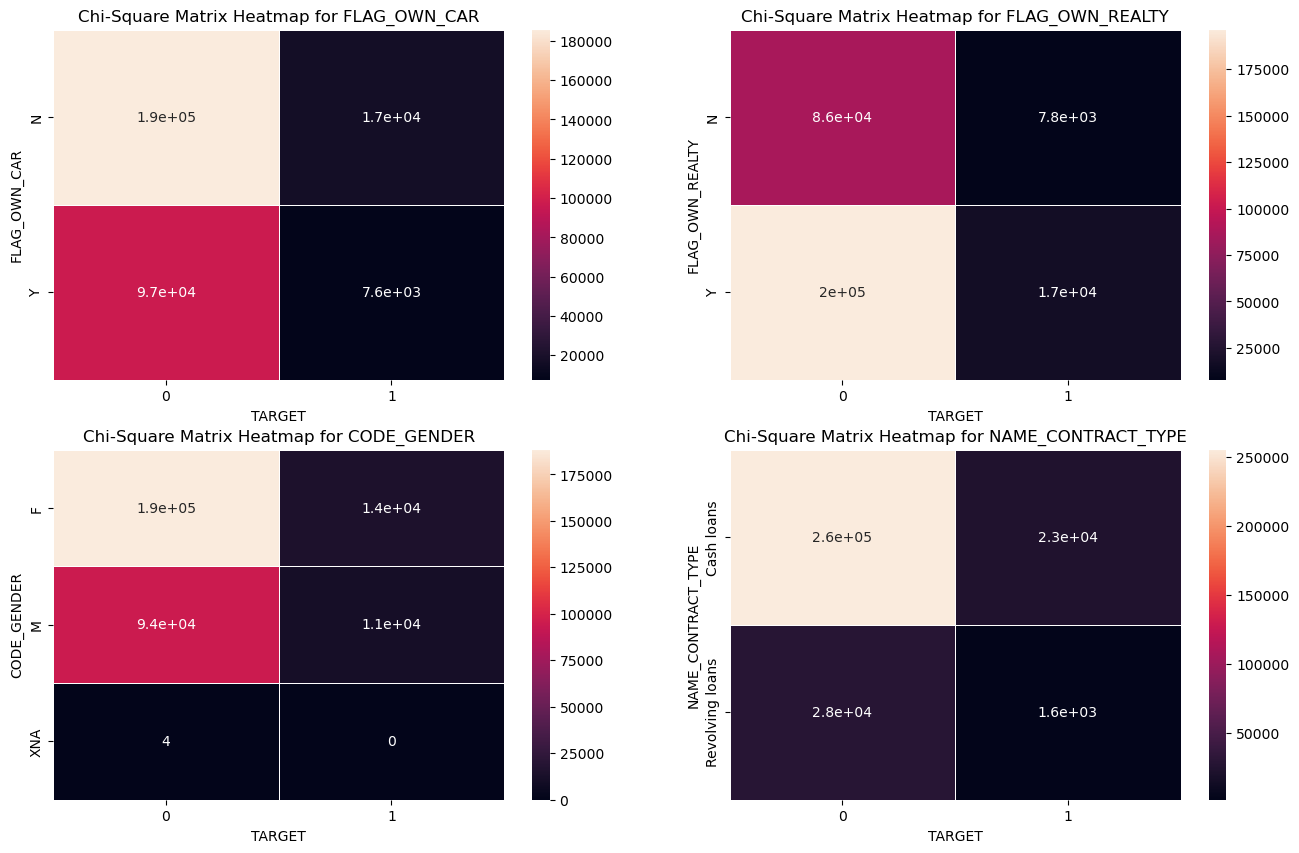

In [115]:
fig, ax = plt.subplots(2,2, figsize=(16,10))
#correlation between target and categorical attributes
for i, column in enumerate(df1_categorical.columns):
    row, col = divmod(i, 2)
    contingency_table = pd.crosstab(df1_categorical[column], target)
    
    # Perform the chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    
    sns.heatmap(contingency_table, annot=True, linewidths=0.5, ax= ax[row,col])
    ax[row,col].set_title(f"Chi-Square Matrix Heatmap for {column}")
    print(f"P value for {column} and TARGET column = {p}")
    print(f"Degrees of Freedom = {dof}\n\n")
plt.show()

- The graphs show that usually there exists no correlation when the Target indicates a Fraudulent Transaction.
- The P-Values provided by X-Square Test between TARGET and all categorical attributes are lower than the level of significance (0.05).
- As a result, we can reject the NULL Hypothesis and assume that there is an overall correlation between the attributes.

### Correlation Analysis

<Axes: >

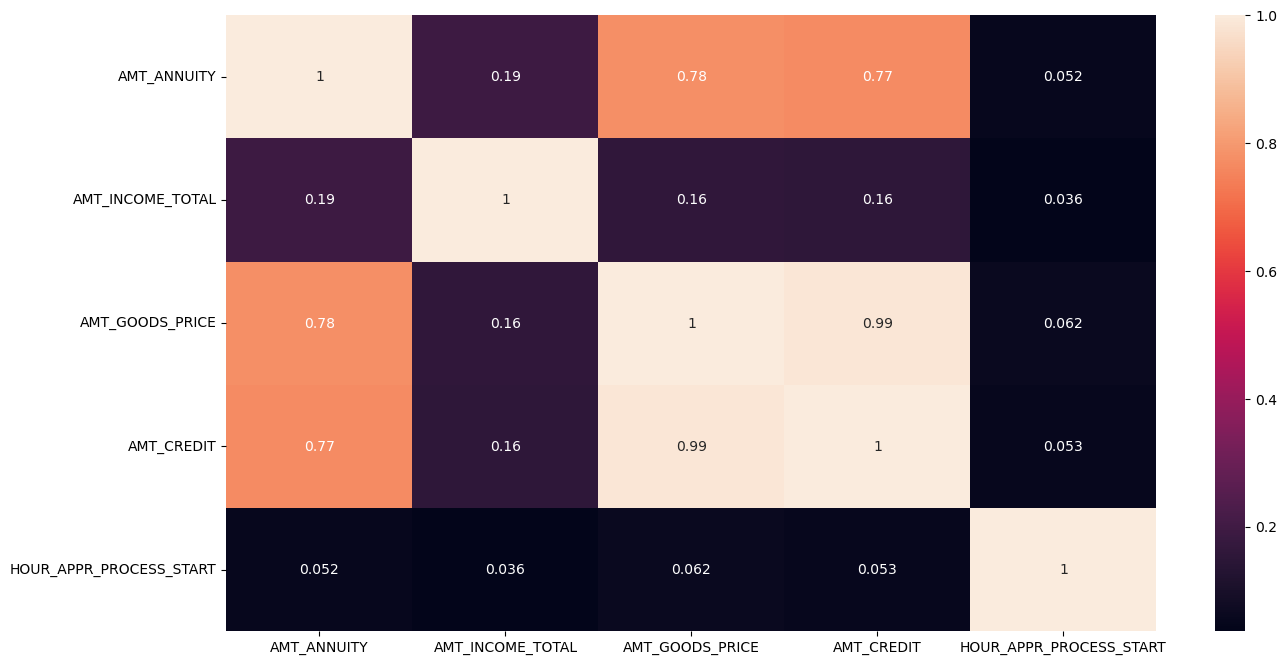

In [116]:
# Correlation Between Continuous Attributes
corr = df1[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE','AMT_CREDIT', 'HOUR_APPR_PROCESS_START']].corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True)

### Visual Exploration (scatter-plot matrix)

c:\Users\mfigu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2200x1000 with 0 Axes>

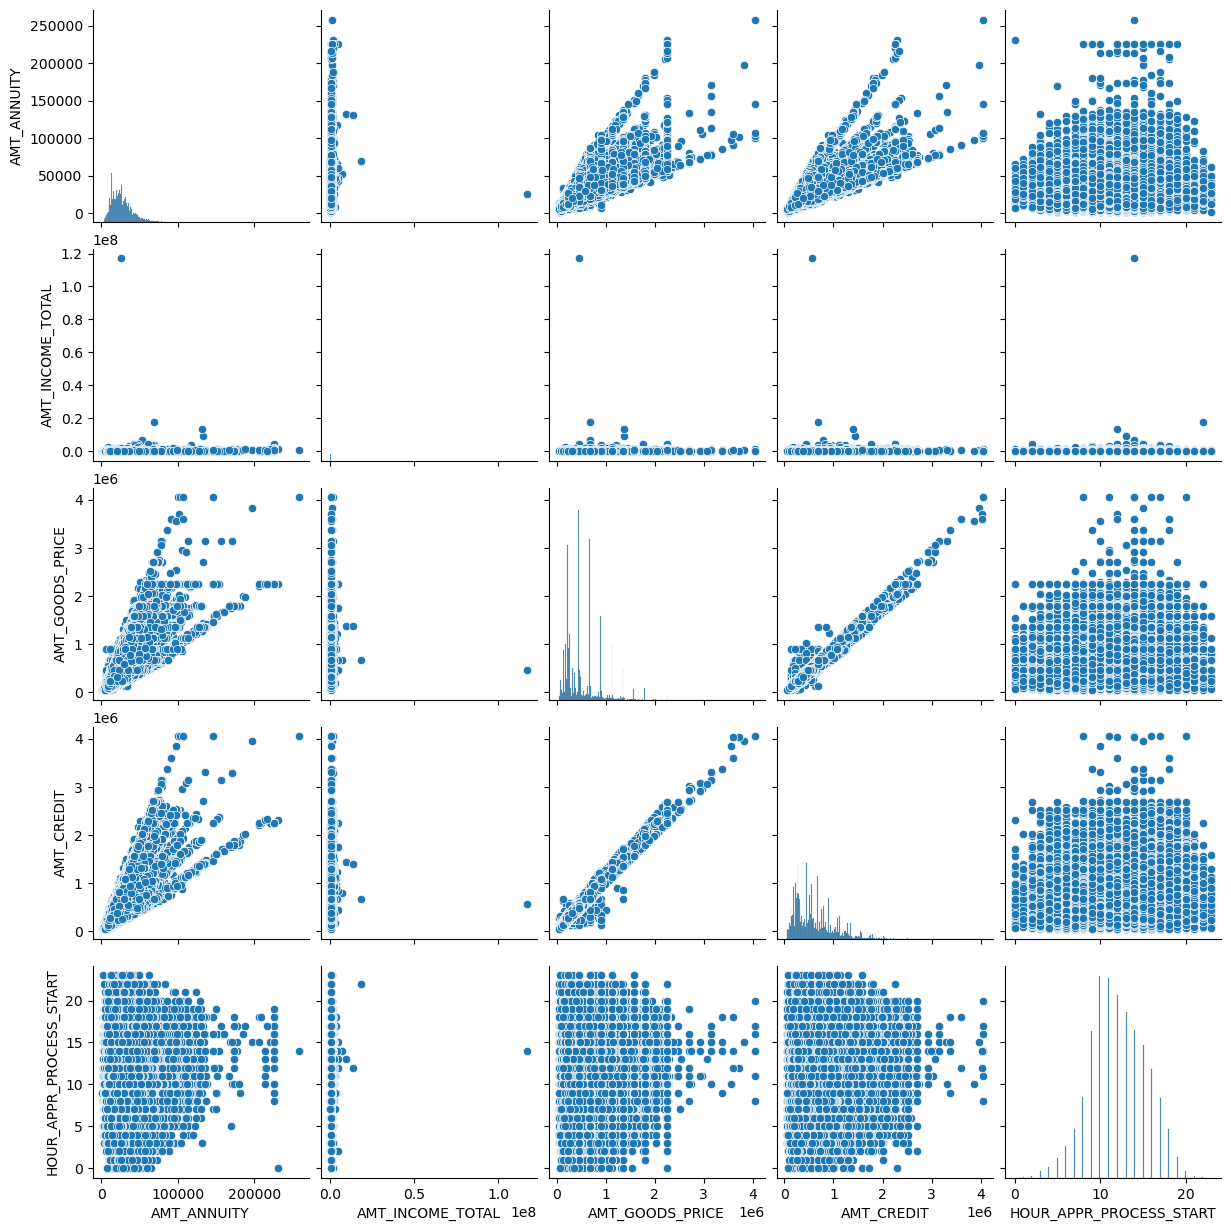

In [117]:
# Visualize a scatter-plot matrix for 'continuous' attributes

# sns.set(style="ticks")
plt.figure(figsize=(22, 10))
sns.pairplot(df1[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE','AMT_CREDIT', 'HOUR_APPR_PROCESS_START']], diag_kind="hist")
plt.show()

- Some strong correlation happens between AMT_GOODS_PRICE and AMT_CREDIT.
- The same goes for AMT_ANNUITY and AMT_CREDIT
- This correlations indicate that the data is thoroughly impacted by these attributes

## Dimensionality Reduction

### PCA

In [118]:
# Standardize the data for continuous values excluding TARGET
df_scaled = df1[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE','AMT_CREDIT', 'HOUR_APPR_PROCESS_START']]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled)

# Fill the null values with the mean
df_scaled = df_scaled.fillna(df_scaled.mean())

In [119]:
# Start PCA with 2 components
pca = PCA(n_components = 4) 
X_pca = pca.fit_transform(df_scaled)
X_pca

array([[-0.6773451 , -0.45025604,  0.47029276, -0.22318999],
       [ 2.3108688 , -0.42816088,  0.16592966,  0.78688513],
       [-2.18890417, -0.78614992,  0.22082663,  0.3096395 ],
       ...,
       [ 0.22843155, -0.92555003,  0.25458231, -0.04639156],
       [-0.9861721 , -0.75383864,  0.48906786, -0.03571024],
       [ 1.27350657,  2.11891242, -1.05077612, -1.07718105]])

In [120]:
pca.explained_variance_ratio_

array([0.54927068, 0.20048545, 0.18908952, 0.05848748])

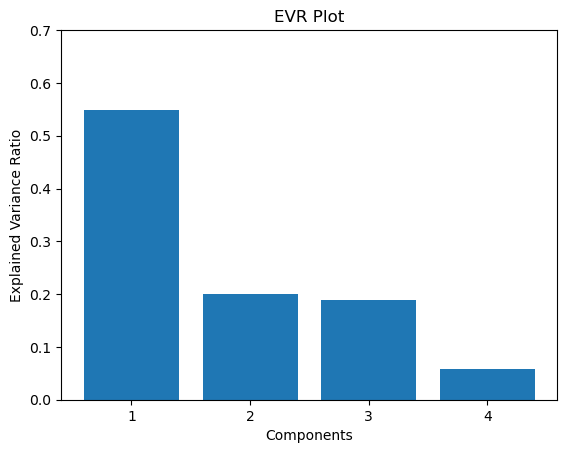

In [121]:
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )


plt.xlabel('Components')
plt.ylabel('Explained Variance Ratio')
plt.title('EVR Plot')
plt.xticks(np.arange(1,5,1))
plt.yticks(np.arange(0, 0.8, 0.1))
plt.show()

- In this scree plot, we can see that Components 1, 2 and 3 account for most of the variation.
- Given that there is a clear indication of variation between the components, we can assume that our data is not too noisy.

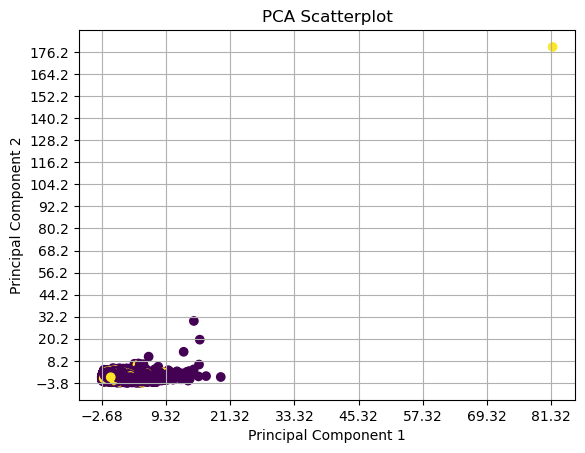

In [122]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=df1["TARGET"])

plt.title("PCA Scatterplot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.xticks(np.arange(min(X_pca[:,0]), max(X_pca[:,0])+1, 12))

plt.yticks(np.arange(min(X_pca[:,1]), max(X_pca[:,1])+1, 12))
plt.grid(True)
plt.show()

## Discretization

### Histogram of Discretized Attribute

### X-square Test of Discretized Attributes

### Visual Exploration (scatter-plot matrix) of Discretized Attributes

## Feature Selection/Generation

### Select Features

### Generate Features

# Generate Clusters

<center>FOR CMPS 451/551</center>

## K-means

Categorical Values need to be converted to continuous values

In [124]:
# Use one-hot label encoding on categorical values
df_encoded = pd.concat([df1, pd.get_dummies(df1.select_dtypes(include='object'), dtype=int)], axis=1)

df_encoded.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_CREDIT,CODE_GENDER,NAME_CONTRACT_TYPE,HOUR_APPR_PROCESS_START,TARGET,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans
0,N,Y,202500.0,351000.0,24700.5,406597.5,M,Cash loans,10,1,1,0,0,1,0,1,0,1,0
1,N,N,270000.0,1129500.0,35698.5,1293502.5,F,Cash loans,11,0,1,0,1,0,1,0,0,1,0
2,Y,Y,67500.0,135000.0,6750.0,135000.0,M,Revolving loans,9,0,0,1,0,1,0,1,0,0,1
3,N,Y,135000.0,297000.0,29686.5,312682.5,F,Cash loans,17,0,1,0,0,1,1,0,0,1,0
4,N,Y,121500.0,513000.0,21865.5,513000.0,M,Cash loans,11,0,1,0,0,1,0,1,0,1,0


In [125]:
# Drop the redundant columns
df_encoded.drop(["FLAG_OWN_CAR","FLAG_OWN_REALTY", "CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR_N", "FLAG_OWN_REALTY_N", "CODE_GENDER_F", "CODE_GENDER_XNA", "NAME_CONTRACT_TYPE_Revolving loans"], axis=1, inplace=True)

df_encoded.head()

,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_CREDIT,HOUR_APPR_PROCESS_START,TARGET,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,CODE_GENDER_M,NAME_CONTRACT_TYPE_Cash loans
0,202500.0,351000.0,24700.5,406597.5,10,1,0,1,1,1
1,270000.0,1129500.0,35698.5,1293502.5,11,0,0,0,0,1
2,67500.0,135000.0,6750.0,135000.0,9,0,1,1,1,0
3,135000.0,297000.0,29686.5,312682.5,17,0,0,1,0,1
4,121500.0,513000.0,21865.5,513000.0,11,0,0,1,1,1


In [126]:
# Fill null values with mean
df_encoded = df_encoded.fillna(df_encoded.mean())

df_encoded.isna().sum()

AMT_INCOME_TOTAL                 0
AMT_GOODS_PRICE                  0
AMT_ANNUITY                      0
AMT_CREDIT                       0
HOUR_APPR_PROCESS_START          0
TARGET                           0
FLAG_OWN_CAR_Y                   0
FLAG_OWN_REALTY_Y                0
CODE_GENDER_M                    0
NAME_CONTRACT_TYPE_Cash loans    0
dtype: int64

In [127]:
# Take a sample of 5000 values from the data for easier model implementation
df_sample = df_encoded.sample(n=5000, random_state=1)


# Get X values and Y
df_sample_x = df_sample.drop("TARGET", axis=1)
df_sample_y = df_sample["TARGET"]


df_sample_x

,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_CREDIT,HOUR_APPR_PROCESS_START,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,CODE_GENDER_M,NAME_CONTRACT_TYPE_Cash loans
64282,135000.0,585000.0,31617.0,654498.0,9,0,1,0,1
94645,135000.0,202500.0,25393.5,234576.0,17,1,1,1,1
306349,112500.0,139500.0,16753.5,157914.0,14,1,1,1,1
258314,247500.0,1125000.0,36292.5,1125000.0,16,1,0,1,1
87597,202500.0,900000.0,35158.5,900000.0,8,0,1,1,1
...,...,...,...,...,...,...,...,...,...
177994,135000.0,940500.0,43447.5,1022436.0,11,1,1,0,1
111324,112500.0,225000.0,11416.5,269550.0,11,0,1,0,1
109454,90000.0,270000.0,13378.5,312768.0,10,0,1,0,1
140452,72000.0,238500.0,16164.0,314055.0,13,1,1,0,1


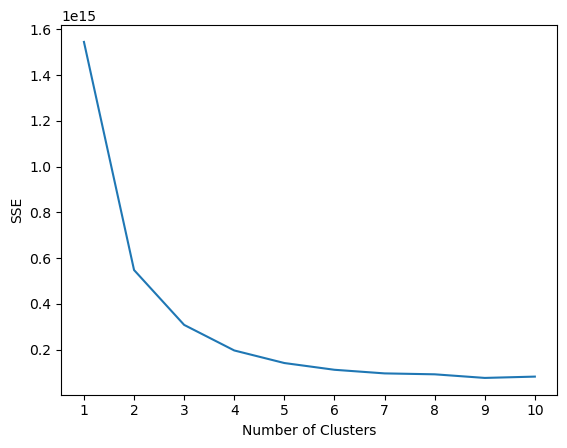

In [128]:
# Determine the best number of clusters
# Data is already scaled

#create a list to hold SSE values for k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, random_state=42, max_iter=300)
    kmeans.fit(df_sample_x)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

- It seems that in this plot, there is an 'elbow' at k=3 clusters.
- We could use this measure to help us produce high quality clusters.
- For our purposes, we will use 2 clusters because this is a classification problem

In [129]:
#instantiate the k-means class, using 2 clusters
kmeans = KMeans(init="random", n_clusters=2, n_init=10, random_state=42)

#fit k-means algorithm to data
kmeans.fit(df_sample_x)

# view cluster assignments for each row
kmeans.labels_



array([0, 0, 0, ..., 0, 0, 0])

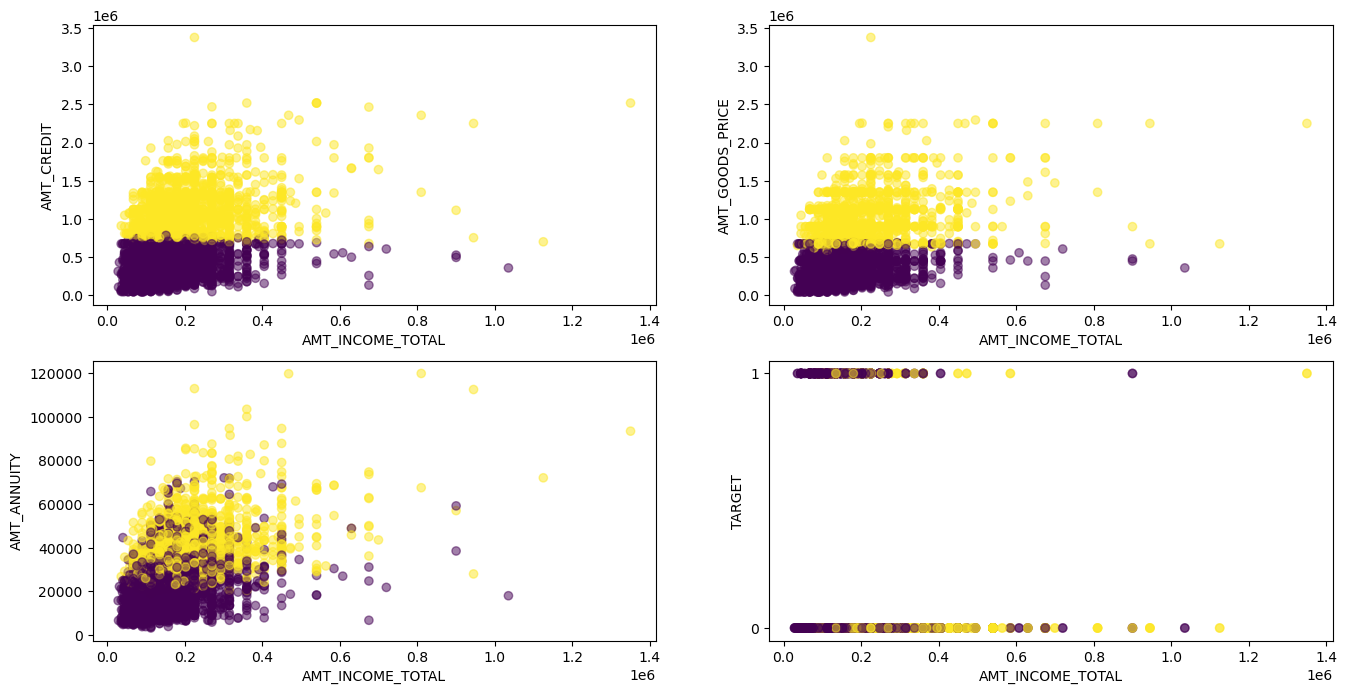

In [130]:
fig, ax = plt.subplots(2, 2, figsize=(16,8))

ax[0,0].scatter(df_sample_x.AMT_INCOME_TOTAL, df_sample_x.AMT_CREDIT, c=kmeans.labels_, cmap='viridis', alpha=0.5)
ax[0,0].set_xlabel("AMT_INCOME_TOTAL")
ax[0,0].set_ylabel("AMT_CREDIT")

ax[0,1].scatter(df_sample_x.AMT_INCOME_TOTAL, df_sample_x.AMT_GOODS_PRICE, c=kmeans.labels_, cmap='viridis', alpha=0.5)
ax[0,1].set_xlabel("AMT_INCOME_TOTAL")
ax[0,1].set_ylabel("AMT_GOODS_PRICE")

ax[1,0].scatter(df_sample_x.AMT_INCOME_TOTAL, df_sample_x.AMT_ANNUITY, c=kmeans.labels_, cmap='viridis', alpha=0.5)
ax[1,0].set_xlabel("AMT_INCOME_TOTAL")
ax[1,0].set_ylabel("AMT_ANNUITY")

ax[1,1].scatter(df_sample_x.AMT_INCOME_TOTAL, df_sample_y, c=kmeans.labels_, cmap='viridis', alpha=0.5)
ax[1,1].set_xlabel("AMT_INCOME_TOTAL")
ax[1,1].set_ylabel("TARGET")

ax[1,1].scatter(df_sample_x.AMT_INCOME_TOTAL, df_sample_y, c=kmeans.labels_, cmap='viridis', alpha=0.5)
ax[1,1].set_xlabel("AMT_INCOME_TOTAL")
ax[1,1].set_ylabel("TARGET")
ax[1,1].set_yticks(np.arange(0,2,1))


plt.show()

- Since we have no clear indicator of which features affect the Target value, we have a few different clustering visualizations.
- We can infer from the last scatter plot that our clustering method is not too great. Clusters for Target=1 and Target=0 are equally divided.

In [131]:
# Add a cluster column to the sample dataframe
df_sample["Cluster"] = kmeans.labels_

df_sample.head()

,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_CREDIT,HOUR_APPR_PROCESS_START,TARGET,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,CODE_GENDER_M,NAME_CONTRACT_TYPE_Cash loans,Cluster
64282,135000.0,585000.0,31617.0,654498.0,9,1,0,1,0,1,0
94645,135000.0,202500.0,25393.5,234576.0,17,0,1,1,1,1,0
306349,112500.0,139500.0,16753.5,157914.0,14,0,1,1,1,1,0
258314,247500.0,1125000.0,36292.5,1125000.0,16,0,1,0,1,1,1
87597,202500.0,900000.0,35158.5,900000.0,8,0,0,1,1,1,1


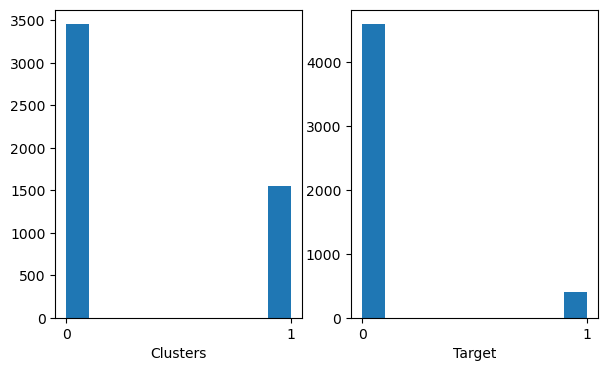

In [177]:
# Check the Distribution of Clusters
fig, ax = plt.subplots(1,2, figsize=(7,4))

ax[0].hist(df_sample["Cluster"])
ax[0].set_xticks(np.arange(0,2,1))
ax[0].set_xlabel("Clusters")
ax[1].hist(df_sample["TARGET"])
ax[1].set_xticks(np.arange(0,2,1))
ax[1].set_xlabel("Target")
plt.show()

## Hierarchical

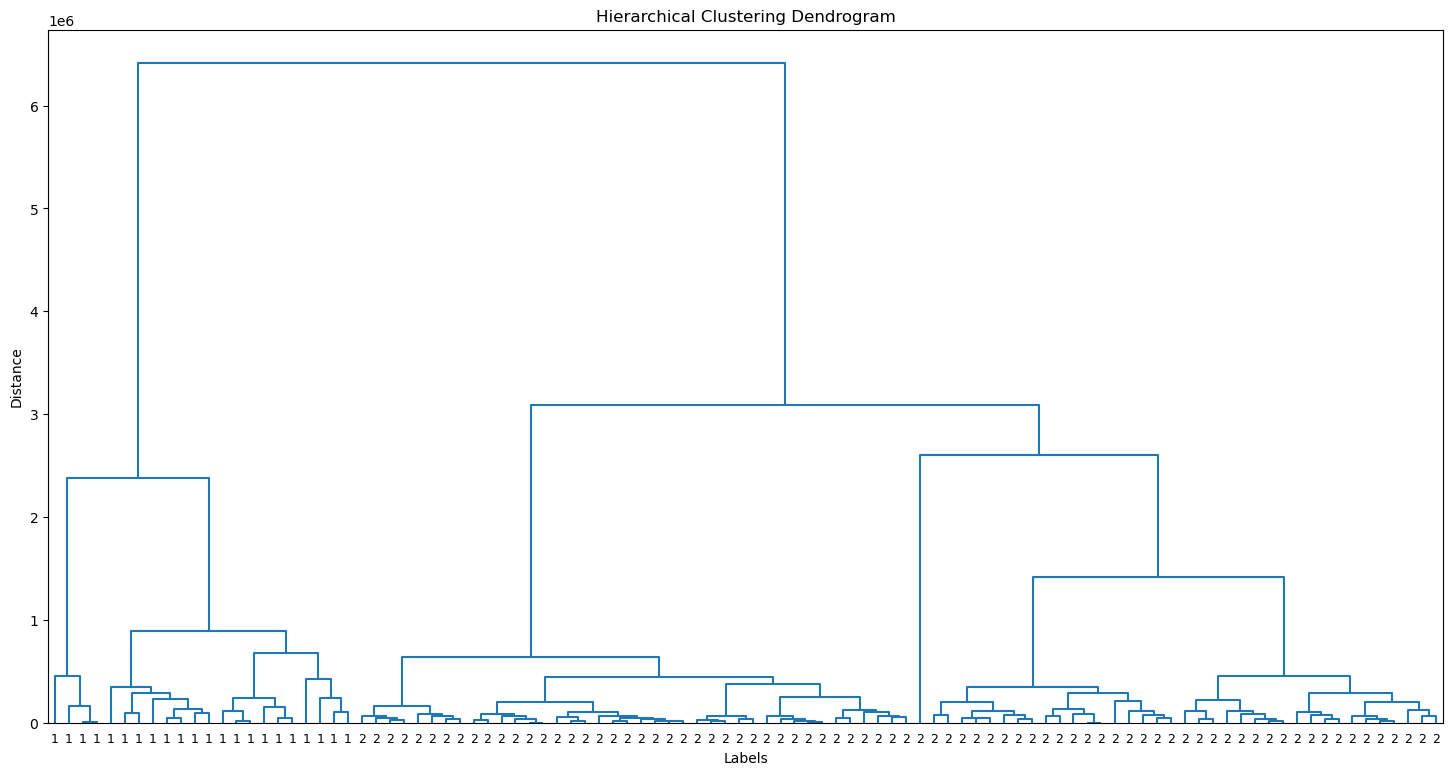

In [132]:
# Reduce the scaled data size down to 100 samples
df_sample_hierarchical = df_encoded.sample(n=100, random_state=42)

df_sample_hierarchical_X = df_sample_hierarchical.drop(["TARGET"], axis=1)

# Perform hierarchical clustering
linkage_data = linkage(df_sample_hierarchical_X, method='ward',metric='euclidean')

num_clusters = 2  # Adjust as needed
labels = fcluster(linkage_data, num_clusters, criterion='maxclust')

# Plot dendogram
plt.figure(figsize=(18, 9))
dendrogram(linkage_data, color_threshold=0, labels=labels, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xticks(rotation=0,fontsize=9)
plt.xlabel('Labels')
plt.ylabel('Distance')
plt.show()


In [152]:
df_sample_hierarchical["Cluster"] = labels

In [153]:
df_sample_hierarchical.head()

,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_CREDIT,HOUR_APPR_PROCESS_START,TARGET,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,CODE_GENDER_M,NAME_CONTRACT_TYPE_Cash loans,Cluster
245895,207000.0,418500.0,52641.0,465457.5,11,0,1,0,1,1,2
98194,247500.0,1179000.0,48946.5,1281712.5,10,0,1,1,0,1,1
36463,202500.0,495000.0,39109.5,495000.0,16,0,1,0,0,1,2
249923,247500.0,225000.0,24939.0,254700.0,14,0,0,1,0,1,2
158389,112500.0,234000.0,15862.5,308133.0,11,0,0,1,1,1,2


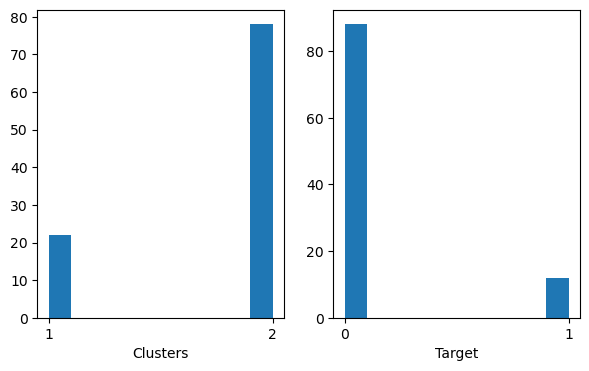

In [166]:
# Check the Distribution of Clusters
fig, ax = plt.subplots(1,2, figsize=(7,4))

ax[0].hist(df_sample_hierarchical["Cluster"])
ax[0].set_xticks(np.arange(1,3,1))
ax[0].set_xlabel("Clusters")
ax[1].hist(df_sample_hierarchical["TARGET"])
ax[1].set_xticks(np.arange(0,2,1))
ax[1].set_xlabel("Target")
plt.show()

In [167]:
# Replace values for clusters to interpret the Target values
df_sample_hierarchical["Cluster"] = df_sample_hierarchical["Cluster"].replace({2:0})

<center>FOR ISAT 651</center>

## CLARANS

## DBSCAN

## CHAMELEON

## CLIQUE

# Evaluation of Clusters

### K-Means Cluster Cohesion and Separation

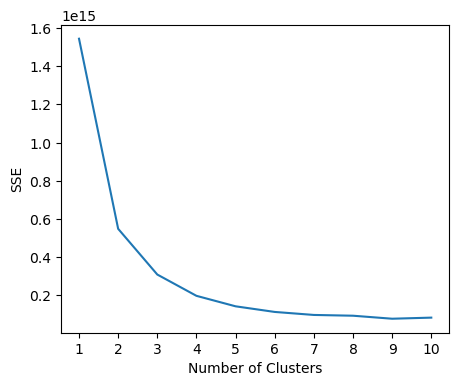

In [137]:
# Visualize SSE Plot
plt.figure(figsize=(5,4))
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

- Cluster Cohesion can be evaluated using SSE. As stated previously, the optimal number of clusters appears to be k = 3 since the Sum of Squared Error rate starts to decrease at this point.
- Clustering methods are not usually evaluated by providing Metrics such as Specificity, Recall and F1 Scores. It is an unsupervised learning algorithm. Furthermore, we are trying to predict wether or not a credit card transaction is fraudulent. It is a classification problem.
- We are going to accomodate our classification problem to this specific method.

In [138]:
silhouette_avg = silhouette_score(df_sample,kmeans.labels_)
print(f"Silhouette score average for K-Means Clustering model: {silhouette_avg}")

Silhouette score average for K-Means Clustering model: 0.5941887916914684


- Cluster Separation and Cohesion for K-Means can be evaluated using the Silhouette Score. We used the "silhouette_score" function to evaluate cluster separation for K-Means. Given that cluster separation in this case is approximately 60% we can safely say that cluster separation and cohesion is decent.

In [139]:
cohesion_score = calinski_harabasz_score(df_sample, kmeans.labels_)
print("Cohesion Score for K-Means Clustering model:", cohesion_score)

Cohesion Score for K-Means Clustering model: 9091.411435772832


### K-Means Cluster Score Assessment

In [140]:
# Split the results for Score Assessment
actual = df_sample.TARGET
prediction = df_sample.Cluster

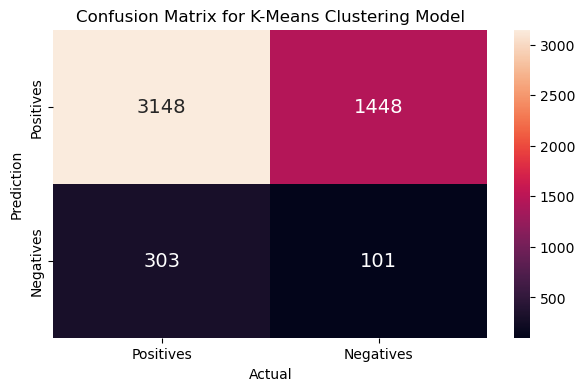

In [141]:
# Calculate Confusion Matrix
conf_matrix = confusion_matrix(actual, prediction)

# Plot the Confusion Matrix
plt.figure(figsize=(7,4))
sns.heatmap(conf_matrix, 
            annot=True,
            fmt='d',
            annot_kws={"size": 14},
            xticklabels=["Positives","Negatives"],
            yticklabels=["Positives","Negatives"])
plt.ylabel("Prediction")
plt.xlabel("Actual")
plt.title("Confusion Matrix for K-Means Clustering Model")
plt.show()

In [142]:
# Calculate Score Assessment
f1 = f1_score(actual,prediction)

specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

prec = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])

rec = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[1,0])

In [143]:
print("K-Means Clustering Score Assessment\n")
print("Precision:", round(prec, 4))
print("Recall:", round(rec, 4))
print("F1 Score:", round(f1, 4))
print("Specificity:", round(specificity,4))

K-Means Clustering Score Assessment

Precision: 0.6849
Recall: 0.9122
F1 Score: 0.1034
Specificity: 0.0652


### Hierarchical Cluster Cohesion and Separation

In [144]:
# Calculate cophenetic correlation coefficient for cohesion
c, coph_dists = cophenet(linkage_data, pdist(df_sample_hierarchical_X))
print("Cophenetic Correlation Coefficient:", c)

Cophenetic Correlation Coefficient: 0.7206516006320322


- The cophenetic correlation coefficient is a metric used to evaluate the quality of a hierarchical clustering algorithm, particularly how well it preserves the pairwise distances between the original data points. 
- In this case our Cophenetic Correlation Coefficient indicates that the cohesion for our Hierarchical Clusters is approximately 72%.

In [145]:
calinski_score = calinski_harabasz_score(df_sample_hierarchical_X, labels)
print("Calinski-Harabasz Index:", calinski_score)

Calinski-Harabasz Index: 144.3885913454563


- The Calinski-Harabaz Index is a metric used to evaluate the separation quality of the clusters.
- The higher the number, the better.

### Hierarchical Cluster Score Assessment

In [169]:
actual_hierarchical = df_sample_hierarchical.TARGET
prediction_hierarchical = df_sample_hierarchical.Cluster

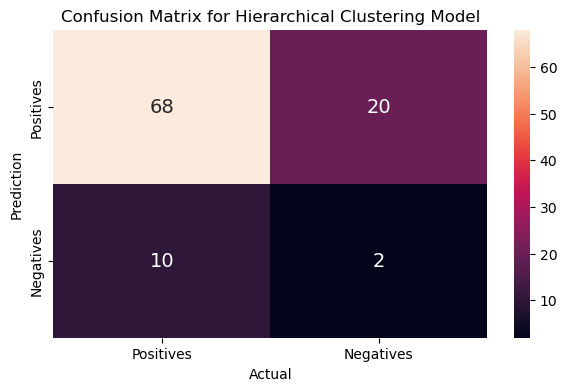

In [174]:
# Calculate Confusion Matrix
conf_matrix_hierarchical = confusion_matrix(actual_hierarchical, prediction_hierarchical)

# Plot the Confusion Matrix
plt.figure(figsize=(7,4))
sns.heatmap(conf_matrix_hierarchical, 
            annot=True,
            fmt='d',
            annot_kws={"size": 14},
            xticklabels=["Positives","Negatives"],
            yticklabels=["Positives","Negatives"])
plt.ylabel("Prediction")
plt.xlabel("Actual")
plt.title("Confusion Matrix for Hierarchical Clustering Model")
plt.show()

In [175]:
# Calculate Score Assessment
f1_hierarchical = f1_score(actual_hierarchical,prediction_hierarchical)

specificity_hierarchical = conf_matrix_hierarchical[1, 1] / (conf_matrix_hierarchical[1, 1] + conf_matrix_hierarchical[0, 1])

prec_hierarchical = conf_matrix_hierarchical[0,0] / (conf_matrix_hierarchical[0,0] + conf_matrix_hierarchical[0,1])

rec_hierarchical = conf_matrix_hierarchical[0,0] / (conf_matrix_hierarchical[0,0] + conf_matrix_hierarchical[1,0])

In [176]:
print("Hierarchical Clustering Score Assessment\n")
print("Precision:", round(prec_hierarchical, 4))
print("Recall:", round(rec_hierarchical, 4))
print("F1 Score:", round(f1_hierarchical, 4))
print("Specificity:", round(specificity_hierarchical,4))

Hierarchical Clustering Score Assessment

Precision: 0.7727
Recall: 0.8718
F1 Score: 0.1176
Specificity: 0.0909


In [178]:
df_excel = df_sample.copy()

df_excel.to_excel("Data_Cluster.xlsx",
             sheet_name='K-Means') 

In [179]:
df_excel = df_sample_hierarchical.copy()

df_excel.to_excel("Data_Cluster.xlsx",
                  sheet_name='Hierarchical'
                  )

# Comparison of Clustering Outcomes

See instructions provided in the report template

## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.

- https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
- https://www.statology.org/k-means-clustering-in-python/
- https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
- https://www.w3schools.com/python/python_ml_hierarchial_clustering.asp
- https://www.kaggle.com/datasets/mishra5001/credit-card/data


- Data Clustering: Algorithms and Applications by Charu C. Aggarwal, Chandan K. Reddy